<a href="https://colab.research.google.com/github/holstbone/Neural-Networks-CIFAR-10/blob/main/A_2_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.2 Computer Vision



## Project Nature and Content - Computer Vision:



Assignment 1 concerned computer vision with a simple neural network, that is, a network with a single hidden layer. We saw what happened when we changed the number of nodes in that single hidden layer. We noted similarities between a single-node, single-hidden-layer network with what is known as a multinomial logit model (logistic regression if there are only two classes). And, to the extent possible, we tried to peer into the network to explain how it worked. We learned that this is often a challenge, especially when working with larger networks.

This second assignment also concerns computer vision. But here we are concerned with deep learning, a neural network with more than one hidden layer. We want to create deep neural networks and to analyze how various factors affect the fitting and ultimate test set performance of these networks. Let us think in practical terms: "How can we build trustworthy deep learning networks?"

**Network Topologies.** Think in terms of exploring alternative network structures/topologies, such as (1) dense versus convolutional neural networks, (2) single- versus multi-hidden-layer networks, and/or (3) convolutional neural networks with differing structures in terms of convolution and pooling layers. Explain your motivation for choosing each topology.

Among the network topologies (structures) you test in this assignment, there should be at least one network with two hidden layers and a network that employs convolution operators (that is, a convolutional neural network). A useful exercise is to compare processing requirements and predictive accuracy of networks with two, three, or more hidden layers, with at least one (but perhaps more than one) of those layers involving a convolution operator.

**Hyperparameter Settings.** Within each network topology, evaluate alternative settings for hyperparameters. Understand that the tuning of hyperparameter settings may be best accomplished by dividing the available data into training, validation, and test sets.

For each network under study, report on its structure and hyperparameter settings. Report on the time it takes to train each network and the performance of that network in the test set. Be sure to check out the possible contribution of few regularization techniques, useful for addressing issues with variance. You may try dropout, batch normalization, and other techniques.

**Visualizations.** Employ visualizations to examine the performance of each network under study. Show training and validation set results (loss/cost and performance/accuracy) across training epochs. Keras will be most useful in executing the study and producing such visualizations.

**Management Problem.** Suppose you are asked to develop a neural network model for a computer vision task such as facial recognition of the user of a mobile device such as a cell phone. Rather than requiring a log-in user name and password or a four-digit key-code, the device requires facial recognition of the user. How would you go about training such a model? Would such a model require deep learning (more than one hidden layer of nodes)/ Would there be any advantage to employing convolutional layers? How would you judge the model's accuracy with real data examples, such as recognition of the face for a cell phone user?



## Motivation and Background Documentation



The primary intent of this assignment is to give you hands-on, practical experience with understanding the transition from simple (single hidden layer) to deep (multiple hidden layers) networks. 

This hinges on understanding how hidden nodes learn to extract features from their inputs. When there are multiple hidden node layers, each successive layer extracts more generalized and abstract features. 

When a hidden layer "learns" the kinds of features that are inherent in its input data, it is using a generative method. In this case, we're not telling it what those feature classes are; it has to figure them out on its own.  

What we will pragmatically do is emulate how a hidden layer learns features by constructing "classes" of input data - where we think that the classes share similar features. We'll put input data into those classes that we THINK have similar features. Then, we conduct experiments to determine what the hidden nodes are actually learning. 

You will have gathered and preprocessed your data, designed and refined your network structure, trained and tested the network, varied the hyperparameters to improve performance and analyzed/assessed the results. 

The most important thing is not just to give a summary of classification rates/errors. I trust that you can get a working classifier, or can train a network to do any useful task. 

**You are welcome to use the CIFAR-10 data for this exercise.** You are welcome to use Python with user-defined functions, Python with TensorFlow, and/or Python with Keras. For example, you can conduct the following experiments on the CIFAR-10 data. The goal is to compare DNN and CNN architectures. In all the experiments, you may hold some parameters constants - for example, the batch size to 100, the number of epochs to 20, same optimizer, same loss function of cross entropy, so that the comparisons are fair.



### **EXPERIMENT 1:** 


DNN with 2 layers (no regularization)




### **EXPERIMENT 2:** 


DNN with 3 layers (no regularization)



### **EXPERIMENT 3:** 



CNN with 2 convolution/max pooling layers (no regularization)



### **EXPERIMENT 4:**


CNN with 3 convolution/max pooling layers (no regularization)



### **EXPERIMENT 5:** 

You will conduct several more experiments. 

1. Redo all the 4 experiments with some regularization technique. 
2. Create more experiments on your own by tweaking architectures and/or hyper parameters.



### **RESULT 1:** 

Create a table with the accuracy and loss for train/test/validation & process time for ALL the models.



### **RESULT 2:** 

Take Experiment 3 – Extract the outputs from 2 filters from the 2 max pooling layers and visualize them in a grid as images. See whether the ‘lighted’ up regions correspond to some features in the original images.



# Andy's Work Starts Here:

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

<div class="alert alert-block alert-info">
<b>The CIFAR-10 dataset</b><br>
https://www.cs.toronto.edu/~kriz/cifar.html
    </div>

In [ ]:
!python --version

Python 3.7.11


## Import Packages



In [ ]:
# Helper libraries
from time import time
from packaging import version
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from keras import regularizers

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [ ]:
print('The matplotlib version is {}.'.format(mpl.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The tensorflow version is {}.'.format(tf.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit learn version is {}.'.format(sklearn.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The matplotlib version is 3.2.2.
The numpy version is 1.19.5.
The tensorflow version is 2.5.0.
The pandas version is 1.1.5.
The scikit learn version is 0.22.2.post1.
The seaborn version is 0.11.1.


## Loading CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br>

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [ ]:
(train_images, train_labels),(test_images, test_labels)= tf.keras.datasets.cifar10.load_data()

* Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
* x_train, x_test: uint8 arrays of color image data with shapes (num_samples, 32, 32).
* y_train, y_test: uint8 arrays of digit labels (integers in range 0-9)

## EDA Training and Test Datasets

* Imported 50000 examples for training and 10000 examples for test 
* Imported 50000 labels for training and 10000 labels for test 

In [ ]:
print('train_images:\t{}'.format(train_images.shape))
print('train_labels:\t{}'.format(train_labels.shape))
print('test_images:\t{}'.format(test_images.shape))
print('test_labels:\t{}'.format(test_labels.shape))

train_images:	(50000, 32, 32, 3)
train_labels:	(50000, 1)
test_images:	(10000, 32, 32, 3)
test_labels:	(10000, 1)


### Review labels for training dataset

In [ ]:
print("First ten labels training dataset:\n {}\n".format(train_labels[0:10]))
print("This output the numeric label, need to convert to item description")

First ten labels training dataset:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]

This output the numeric label, need to convert to item description


### Plot Examples

In [ ]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_preview, y_preview = get_three_classes(x_train, y_train)
x_preview, y_preview = get_three_classes(x_test, y_test)

In [ ]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

### Random Review of Examples 

In [ ]:
show_random_examples(x_preview, y_preview, y_preview)

## Preprocessing Data for Model Development

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of object the image represents:

|Label  |Class_  |
|-------|--------|
|0|	airplane     |
|1|	automobile   |
|2|	bird         |
|3|	cat          |
|4|	deer         |
|5|	dog          |
|6|	frog         |
|7|	horse        |
|8|	ship         |
|9|	truck        |

In [ ]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

### Preprocessing the Examples
 The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
 

1. Each element in each example is a pixel value
2. Pixel values range from 0 to 255
3. 0 = black
4. 255 = white

In [ ]:
train_images_norm = train_images.astype('float32')/255.
test_images_norm = test_images.astype('float32')/255.

In [ ]:
train_images_norm.shape, test_images_norm.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Validating our approach

10,000 samples of our training data to use as a validation set. 

In [ ]:
val_images_norm, train_images_norm = train_images_norm[:3000], train_images_norm[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [ ]:
val_images_norm.shape, val_labels.shape

((3000, 32, 32, 3), (3000, 1))

In [ ]:
train_images_norm.shape, train_labels.shape

((47000, 32, 32, 3), (47000, 1))

## Create the Model

<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/CNN_architecture_v4.png?raw=1">


### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 4 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

### Compiling the model

In addition to setting up our model architecture, we also need to define which algorithm should the model use in order to optimize the weights and biases as per the given data. We will use stochastic gradient descent.

We also need to define a loss function. Think of this function as the difference between the predicted outputs and the actual outputs given in the dataset. This loss needs to be minimised in order to have a higher model accuracy. That's what the optimization algorithm essentially does - it minimises the loss during model training. For our multi-class classification problem, categorical cross entropy is commonly used.

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

<div class="alert alert-block alert-info">
<b>tf.keras.losses.SparseCategoricalCrossentropy</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy</div>

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

<div class="alert alert-block alert-success">
    <b>Module: tf.keras.callbacks</b></div>

<div class="alert alert-block alert-info">
<b>tf.keras.callbacks.EarlyStopping</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping</div>

<div class="alert alert-block alert-info">
<b>tf.keras.callbacks.ModelCheckpoint</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint</div>

In [ ]:
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

<div class="alert alert-block alert-info">
<b>tf.keras.models.load_model</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model</div>

In [ ]:
model = tf.keras.models.load_model('./models/model_0.8160.h5')

In [ ]:
preds = model.predict(test_images_norm)

In [ ]:
preds.shape

### Predictions

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

In [ ]:
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[2004]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

In [ ]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
len(activations)

In [ ]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
    
layer_names

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();

# **EXPERIMENT 1:** 


DNN with 2 layers (no regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 128 nodes and use the `relu` activation function.
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    #,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                    #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                    #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                    )
model_time = time() - start

Epoch 1/50
92/92 [==============================] - 4s 7ms/step - loss: 2.0072 - accuracy: 0.2736 - val_loss: 1.8440 - val_accuracy: 0.3373
Epoch 2/50
92/92 [==============================] - 0s 5ms/step - loss: 1.8065 - accuracy: 0.3574 - val_loss: 1.7282 - val_accuracy: 0.3900
Epoch 3/50
92/92 [==============================] - 0s 5ms/step - loss: 1.7251 - accuracy: 0.3910 - val_loss: 1.6735 - val_accuracy: 0.4047
Epoch 4/50
92/92 [==============================] - 0s 5ms/step - loss: 1.6636 - accuracy: 0.4113 - val_loss: 1.6315 - val_accuracy: 0.4230
Epoch 5/50
92/92 [==============================] - 0s 5ms/step - loss: 1.6120 - accuracy: 0.4308 - val_loss: 1.5743 - val_accuracy: 0.4350
Epoch 6/50
92/92 [==============================] - 0s 5ms/step - loss: 1.5855 - accuracy: 0.4373 - val_loss: 1.5952 - val_accuracy: 0.4260
Epoch 7/50
92/92 [==============================] - 0s 5ms/step - loss: 1.5504 - accuracy: 0.4524 - val_loss: 1.5567 - val_accuracy: 0.4407
Epoch 8/50
92/92 [==

## Evaluate the model

In [ ]:
model_time

41.85528564453125

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.4120 - accuracy: 0.5045
test set accuracy:  50.44999718666077
test set loss:  1.4120160341262817


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
45  1.349     0.564     1.458         0.532
46  1.343     0.567     1.465         0.530
47  1.341     0.570     1.458         0.530
48  1.338     0.568     1.460         0.527
49  1.326     0.575     1.451         0.529

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

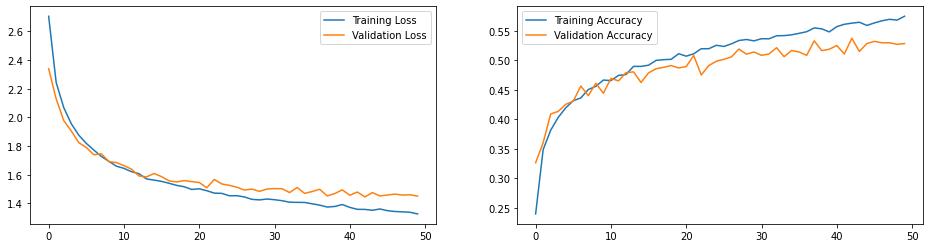

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[553,  21,  81,   8,  49,  13,  19,  24, 137,  95],
       [ 49, 513,  15,  13,  18,  13,  17,  27,  66, 269],
       [ 72,  17, 352,  58, 203,  63, 119,  60,  19,  37],
       [ 32,  23, 102, 257, 103, 159, 158,  52,  37,  77],
       [ 49,   9, 117,  29, 528,  29, 122,  66,  24,  27],
       [ 25,  15,  89, 171, 115, 339,  96,  70,  32,  48],
       [  9,  13,  54,  50, 154,  35, 620,  21,  13,  31],
       [ 35,  13,  60,  43, 129,  41,  34, 551,  28,  66],
       [ 85,  41,  20,  21,  33,  13,  17,  18, 658,  94],
       [ 41, 110,   9,  15,  20,  15,  22,  37,  57, 674]], dtype=int32)>

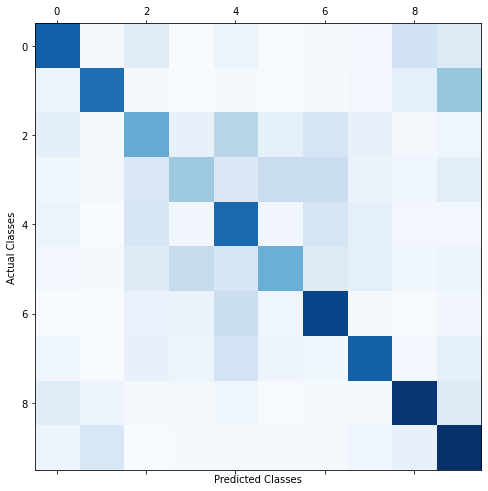

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 1B:** 


DNN with 2 layers (Tune nodes)

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with varying nodes and use the `relu` activation function.
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
def train_test_model(nodes_1, nodes_2):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32,32,3)),
      tf.keras.layers.Dense(nodes_1, activation=tf.nn.relu),
      tf.keras.layers.Dense(nodes_2, activation=tf.nn.relu),    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax),]
      )

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'],
      )
  
  start = time()
  history = model.fit(train_images_norm
                      ,train_labels
                      ,epochs=50
                      ,batch_size=512
                      ,validation_data=(val_images_norm,val_labels)
                      ,verbose=0
                      #,callbacks=[
                      #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                      #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                      #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                      )
  model_time = time() - start
  loss, accuracy = model.evaluate(test_images_norm, test_labels)
  preds = model.predict(test_images_norm)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
nodes_1 = [32, 64, 128, 256]
nodes_2 = [32, 64, 128, 256]

In [ ]:
model = []
history = [] 
loss = []
accuracy = []
preds = []
model_time = []

for node_1 in nodes_1:
  for node_2 in nodes_2:
    model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = train_test_model(node_1, node_2)
    model.append(model_temp)
    history.append(history_temp)
    loss.append(loss_temp)
    accuracy.append(accuracy_temp)
    preds.append(preds_temp)
    model_time.append(time_temp)
    final_ta = history_temp.history['accuracy'][-1]
    final_tl = history_temp.history['loss'][-1]
    final_va = history_temp.history['val_accuracy'][-1]
    final_vl = history_temp.history['val_loss'][-1]
    print(f'Training set accuracy for {node_1}, {node_2} Model: {final_ta * 100}')
    print(f'Training set loss for {node_1}, {node_2} Model: {final_tl}')
    print(f'Validation set accuracy for {node_1}, {node_2} Model: {final_va * 100}')
    print(f'Validation set loss for {node_1}, {node_2} Model: {final_vl}')

313/313 [==============================] - 1s 2ms/step - loss: 1.6163 - accuracy: 0.4162
Training set accuracy for 32, 32 Model: 43.646809458732605
Training set loss for 32, 32 Model: 1.5768461227416992
Validation set accuracy for 32, 32 Model: 42.59999990463257
Validation set loss for 32, 32 Model: 1.579840064048767
313/313 [==============================] - 1s 2ms/step - loss: 1.6554 - accuracy: 0.4037
Training set accuracy for 32, 64 Model: 42.21276640892029
Training set loss for 32, 64 Model: 1.611556053161621
Validation set accuracy for 32, 64 Model: 40.99999964237213
Validation set loss for 32, 64 Model: 1.6285454034805298
313/313 [==============================] - 1s 2ms/step - loss: 1.5014 - accuracy: 0.4689
Training set accuracy for 32, 128 Model: 49.06382858753204
Training set loss for 32, 128 Model: 1.4304558038711548
Validation set accuracy for 32, 128 Model: 48.233333230018616
Validation set loss for 32, 128 Model: 1.4717973470687866
313/313 [==============================

In [ ]:
accuracy[15]

0.5248000025749207

In [ ]:
model = model[15]
history = history[15] 
loss = loss[15]
accuracy = accuracy[15]
preds = preds[15]
model_time = model_time[15]

In [ ]:
model_time

41.55602717399597

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.4006 - accuracy: 0.5248
test set accuracy:  52.480000257492065
test set loss:  1.4006356000900269


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

# **EXPERIMENT 1C:** 


DNN with 2 layers (Tune batch size)

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 1024, 128 nodes (respectively) and use the `relu` activation function.
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
def train_test_model(batch):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32,32,3)),
      tf.keras.layers.Dense(1024, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax),]
      )

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'],
      )
  
  start = time()
  history = model.fit(train_images_norm
                      ,train_labels
                      ,epochs=50
                      ,batch_size=batch
                      ,validation_data=(val_images_norm,val_labels)
                      ,verbose=0
                      #,callbacks=[
                      #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                      #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                      #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                      )
  model_time = time() - start
  loss, accuracy = model.evaluate(test_images_norm, test_labels)
  preds = model.predict(test_images_norm)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
vary_batch_size = [64, 128, 256, 512, 1024]

In [ ]:
model = []
history = [] 
loss = []
accuracy = []
preds = []
model_time = []

for batch_s in vary_batch_size:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = train_test_model(batch_s)
  model.append(model_temp)
  history.append(history_temp)
  loss.append(loss_temp)
  accuracy.append(accuracy_temp)
  preds.append(preds_temp)
  model_time.append(time_temp)
  final_val = history_temp.history['val_accuracy'][-1]
  final_loss = history_temp.history['val_loss'][-1]
  print(f'Validation set accuracy for Batch Size {batch_s}: {final_val * 100}')
  print(f'Validation set loss for Batch Size {batch_s}: {final_loss}')

In [ ]:
loss

In [ ]:
accuracy[4]

In [ ]:
model = model[4]
history = history[4] 
loss = loss[4]
accuracy = accuracy[4]
preds = preds[4]
model_time = model_time[4]

In [ ]:
model_time

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

# **EXPERIMENT 1D:** 


DNN with 2 layers (ADD L1+L2 Regularization)

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 512, 256 nodes (respectively) and use the `relu` activation function.
 * A L1+L2 Regularization is added to see if this reduces overfitting
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
def train_test_model(l_1, l_2):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32,32,3)),
      tf.keras.layers.Dense(1024, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=l_1, l2=l_2)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=l_1, l2=l_2)),    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax),]
      )

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'],
      )
  
  start = time()
  history = model.fit(train_images_norm
                      ,train_labels
                      ,epochs=50
                      ,batch_size=1024
                      ,validation_data=(val_images_norm,val_labels)
                      ,verbose=0
                      #,callbacks=[
                      #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                      #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                      #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                      )
  model_time = time() - start
  loss, accuracy = model.evaluate(test_images_norm, test_labels)
  preds = model.predict(test_images_norm)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
l1_val = [0.000001, 0.00001]
l2_val = [0.0001, 0.001]

In [ ]:
model = []
history = [] 
loss = []
accuracy = []
preds = []
model_time = []

for l_1 in l1_val:
  for l_2 in l2_val:
    model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = train_test_model(l_1, l_2)
    model.append(model_temp)
    history.append(history_temp)
    loss.append(loss_temp)
    accuracy.append(accuracy_temp)
    preds.append(preds_temp)
    model_time.append(time_temp)
    final_val = history_temp.history['val_accuracy'][-1]
    final_loss = history_temp.history['val_loss'][-1]
    print(f'Validation set accuracy for L1 {l_1}, L2 {l_2}: {final_val * 100}')
    print(f'Validation set loss for L1 {l_1}, L2 {l_2}: {final_loss}')

In [ ]:
accuracy[0]

In [ ]:
model = model[0]
history = history[0] 
loss = loss[0]
accuracy = accuracy[0]
preds = preds[0]
model_time = model_time[0]

In [ ]:
model_time

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

# **EXPERIMENT 1E:** 


DNN with 2 layers (ADD L2 Regularization only)

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 512, 256 nodes (respectively) and use the `relu` activation function.
 * A L2 Regularization (NO L1) is added to see if this reduces overfitting
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
def train_test_model(l_2):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32,32,3)),
      tf.keras.layers.Dense(1028, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l_2)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l_2)),    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax),]
      )

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'],
      )
  
  start = time()
  history = model.fit(train_images_norm
                      ,train_labels
                      ,epochs=50
                      ,batch_size=1024
                      ,validation_data=(val_images_norm,val_labels)
                      ,verbose=0
                      #,callbacks=[
                      #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                      #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                      #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                      )
  model_time = time() - start
  loss, accuracy = model.evaluate(test_images_norm, test_labels)
  preds = model.predict(test_images_norm)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
l2_val = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001]

In [ ]:
model = []
history = [] 
loss = []
accuracy = []
preds = []
model_time = []

for l_2 in l2_val:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = train_test_model(l_2)
  model.append(model_temp)
  history.append(history_temp)
  loss.append(loss_temp)
  accuracy.append(accuracy_temp)
  preds.append(preds_temp)
  model_time.append(time_temp)
  final_val = history_temp.history['val_accuracy'][-1]
  final_loss = history_temp.history['val_loss'][-1]
  print(f'Validation set accuracy for L2 {l_2}: {final_val * 100}')
  print(f'Validation set loss for L2 {l_2}: {final_loss}')

In [ ]:
accuracy[2]

### Model 1E[0]

In [ ]:
model_1e = model[0]
history_1e = history[0] 
loss_1e = loss[0]
accuracy_1e = accuracy[0]
preds_1e = preds[0]
model_time_1e = model_time[0]

In [ ]:
model_time_1e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_1e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_1e.history['loss']
accs = history_1e.history['accuracy']
val_losses = history_1e.history['val_loss']
val_accs = history_1e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 1E[1]

In [ ]:
model_1e = model[1]
history_1e = history[1] 
loss_1e = loss[1]
accuracy_1e = accuracy[1]
preds_1e = preds[1]
model_time_1e = model_time[1]

In [ ]:
model_time_1e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_1e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_1e.history['loss']
accs = history_1e.history['accuracy']
val_losses = history_1e.history['val_loss']
val_accs = history_1e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 1E[2]

In [ ]:
model_1e = model[2]
history_1e = history[2] 
loss_1e = loss[2]
accuracy_1e = accuracy[2]
preds_1e = preds[2]
model_time_1e = model_time[2]

In [ ]:
model_time_1e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_1e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_1e.history['loss']
accs = history_1e.history['accuracy']
val_losses = history_1e.history['val_loss']
val_accs = history_1e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 1E[3]

In [ ]:
model_1e = model[3]
history_1e = history[3] 
loss_1e = loss[3]
accuracy_1e = accuracy[3]
preds_1e = preds[3]
model_time_1e = model_time[3]

In [ ]:
model_time_1e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_1e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_1e.history['loss']
accs = history_1e.history['accuracy']
val_losses = history_1e.history['val_loss']
val_accs = history_1e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 1E[4]

In [ ]:
model_1e = model[4]
history_1e = history[4] 
loss_1e = loss[4]
accuracy_1e = accuracy[4]
preds_1e = preds[4]
model_time_1e = model_time[4]

In [ ]:
model_time_1e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_1e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_1e.history['loss']
accs = history_1e.history['accuracy']
val_losses = history_1e.history['val_loss']
val_accs = history_1e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

# **EXPERIMENT 1-FINAL:** 


DNN with 2 layers (with L2 regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 256, 256 nodes (respectively) and use the `relu` activation function.
* The final layer outputs 10 probability results, using the `softmax` activiation function.  
* No Early Stopping callback

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(256, activation='relu'))#, kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(256, activation='relu'))#, kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


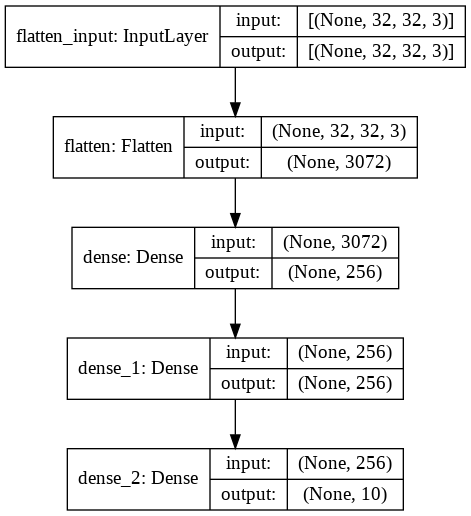

In [ ]:
keras.utils.plot_model(model, "CIFAR10_1F.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_1/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                          
                    )
model_time = time() - start

Epoch 1/50
46/46 [==============================] - 4s 14ms/step - loss: 2.1089 - accuracy: 0.2387 - val_loss: 1.8837 - val_accuracy: 0.3230
Epoch 2/50
46/46 [==============================] - 0s 11ms/step - loss: 1.8557 - accuracy: 0.3414 - val_loss: 1.7887 - val_accuracy: 0.3537
Epoch 3/50
46/46 [==============================] - 0s 10ms/step - loss: 1.7625 - accuracy: 0.3758 - val_loss: 1.7198 - val_accuracy: 0.3740
Epoch 4/50
46/46 [==============================] - 0s 10ms/step - loss: 1.7109 - accuracy: 0.3950 - val_loss: 1.6704 - val_accuracy: 0.3957
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 1.6550 - accuracy: 0.4143 - val_loss: 1.6119 - val_accuracy: 0.4240
Epoch 6/50
46/46 [==============================] - 0s 10ms/step - loss: 1.6129 - accuracy: 0.4316 - val_loss: 1.5955 - val_accuracy: 0.4243
Epoch 7/50
46/46 [==============================] - 0s 11ms/step - loss: 1.5786 - accuracy: 0.4445 - val_loss: 1.5576 - val_accuracy: 0.4420
Epoch 8/50
46

## Evaluate the model

In [ ]:
model_time

28.75770330429077

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.3895 - accuracy: 0.5226
test set accuracy:  52.2599995136261
test set loss:  1.3895071744918823


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
45  1.121     0.607     1.339         0.532
46  1.115     0.608     1.355         0.530
47  1.108     0.609     1.345         0.538
48  1.096     0.616     1.372         0.531
49  1.094     0.616     1.362         0.533

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

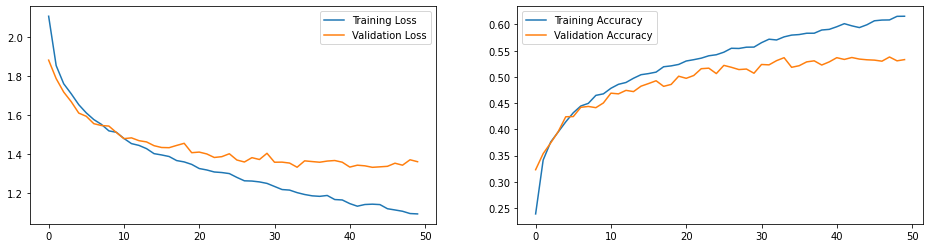

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[595,  38,  21,  18,  34,   8,  27,  52, 120,  87],
       [ 35, 642,   7,  23,  11,  10,  19,  30,  57, 166],
       [ 85,  22, 244, 108, 136,  65, 130, 151,  26,  33],
       [ 44,  20,  36, 384,  55, 126, 140, 108,  34,  53],
       [ 55,  13,  58,  68, 438,  31, 135, 163,  21,  18],
       [ 31,   8,  35, 244,  72, 331,  82, 136,  32,  29],
       [ 12,  20,  27,  81,  99,  36, 630,  54,  14,  27],
       [ 28,  17,  17,  57,  66,  37,  22, 684,  17,  55],
       [102,  60,   7,  34,  16,  14,   9,  26, 650,  82],
       [ 41, 156,   5,  29,   8,  14,  21,  53,  45, 628]], dtype=int32)>

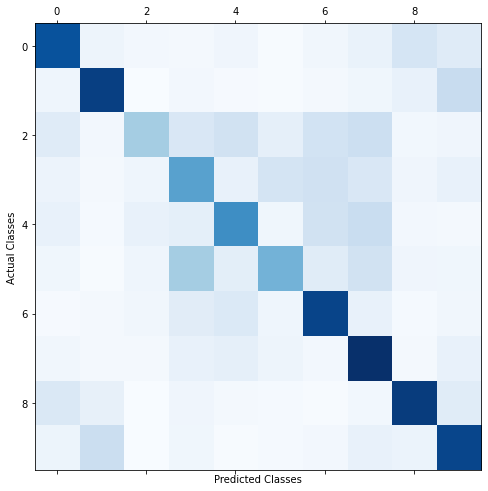

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 1-FINAL:** 


DNN with 2 layers (with L2 regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 512, 256 nodes (respectively) and use the `relu` activation function.
 * A L2 Regularization (NO L1) is added with L2=0.001 reduce overfitting
* The final layer outputs 10 probability results, using the `softmax` activiation function.  
* No Early Stopping callback

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


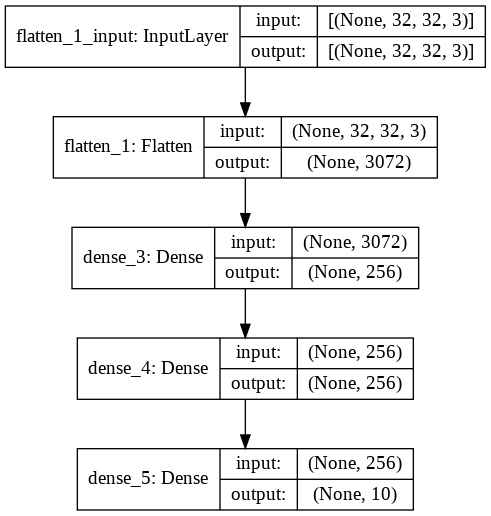

In [ ]:
keras.utils.plot_model(model, "CIFAR10_1F.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_1/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                          
                    )
model_time = time() - start

Epoch 1/50
46/46 [==============================] - 1s 14ms/step - loss: 3.6099 - accuracy: 0.2425 - val_loss: 2.8852 - val_accuracy: 0.3260
Epoch 2/50
46/46 [==============================] - 0s 10ms/step - loss: 2.6143 - accuracy: 0.3397 - val_loss: 2.3550 - val_accuracy: 0.3780
Epoch 3/50
46/46 [==============================] - 1s 11ms/step - loss: 2.2507 - accuracy: 0.3757 - val_loss: 2.1199 - val_accuracy: 0.3840
Epoch 4/50
46/46 [==============================] - 0s 10ms/step - loss: 2.0760 - accuracy: 0.3882 - val_loss: 1.9823 - val_accuracy: 0.4097
Epoch 5/50
46/46 [==============================] - 1s 11ms/step - loss: 1.9652 - accuracy: 0.4052 - val_loss: 1.9190 - val_accuracy: 0.4003
Epoch 6/50
46/46 [==============================] - 0s 10ms/step - loss: 1.8968 - accuracy: 0.4158 - val_loss: 1.8592 - val_accuracy: 0.4167
Epoch 7/50
46/46 [==============================] - 0s 10ms/step - loss: 1.8320 - accuracy: 0.4291 - val_loss: 1.7906 - val_accuracy: 0.4220
Epoch 8/50
46

## Evaluate the model

In [ ]:
model_time

26.558128118515015

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.5866 - accuracy: 0.4798
test set accuracy:  47.97999858856201
test set loss:  1.586622953414917


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
45  1.474     0.524     1.526         0.499
46  1.476     0.523     1.541         0.495
47  1.469     0.526     1.551         0.498
48  1.465     0.528     1.509         0.507
49  1.467     0.528     1.575         0.480

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

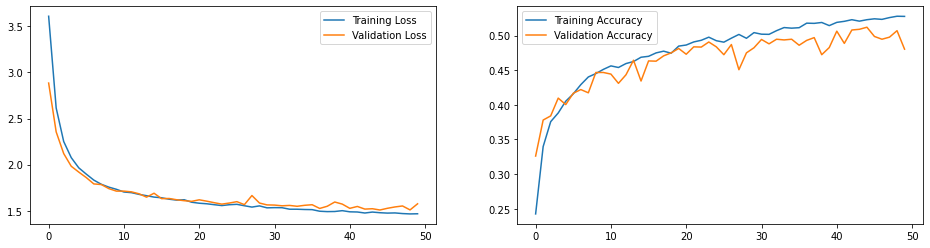

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

# **EXPERIMENT 2:** 


DNN with 3 layers (no regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The 3 hidden layers are each fully connected Dense layers with 1024, 128, and 128 nodes (respectively) and use the `relu` activation function.
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_43 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_129 (Dense)            (None, 256)               786688    
_________________________________________________________________
dense_130 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_131 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_132 (Dense)            (None, 10)                1290      
Total params: 886,666
Trainable params: 886,666
Non-trainable params: 0
_________________________________________________________________


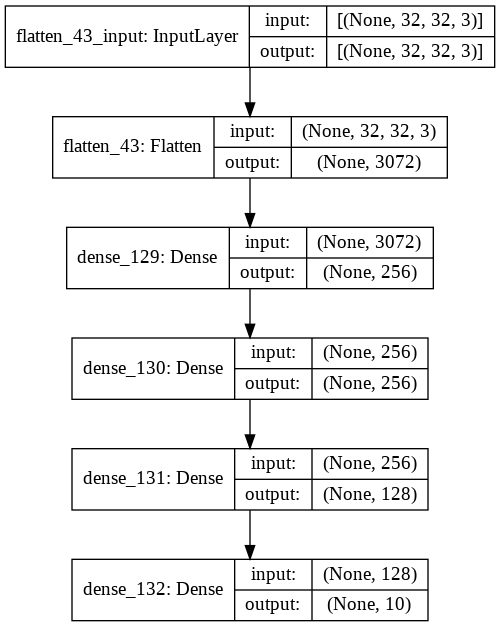

In [ ]:
keras.utils.plot_model(model, "CIFAR10_2.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    #,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    #tf.keras.callbacks.ModelCheckpoint('./models_2/model_{val_accuracy:.4f}.h5', save_best_only=True,
                    #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/50
46/46 [==============================] - 1s 12ms/step - loss: 2.0278 - accuracy: 0.2636 - val_loss: 1.8435 - val_accuracy: 0.3353
Epoch 2/50
46/46 [==============================] - 0s 10ms/step - loss: 1.8076 - accuracy: 0.3581 - val_loss: 1.7322 - val_accuracy: 0.3720
Epoch 3/50
46/46 [==============================] - 0s 10ms/step - loss: 1.7080 - accuracy: 0.3913 - val_loss: 1.6901 - val_accuracy: 0.3977
Epoch 4/50
46/46 [==============================] - 0s 10ms/step - loss: 1.6486 - accuracy: 0.4124 - val_loss: 1.5947 - val_accuracy: 0.4273
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 1.5856 - accuracy: 0.4387 - val_loss: 1.5746 - val_accuracy: 0.4240
Epoch 6/50
46/46 [==============================] - 0s 9ms/step - loss: 1.5467 - accuracy: 0.4520 - val_loss: 1.5299 - val_accuracy: 0.4550
Epoch 7/50
46/46 [==============================] - 0s 10ms/step - loss: 1.5199 - accuracy: 0.4611 - val_loss: 1.5100 - val_accuracy: 0.4593
Epoch 8/50
46/

## Evaluate the model

In [ ]:
model_time

23.903380155563354

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.4022 - accuracy: 0.5272
test set accuracy:  52.719998359680176
test set loss:  1.4022047519683838


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
45  0.940     0.668     1.359         0.544
46  0.921     0.676     1.391         0.544
47  0.917     0.678     1.393         0.540
48  0.919     0.675     1.406         0.543
49  0.895     0.683     1.390         0.544

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

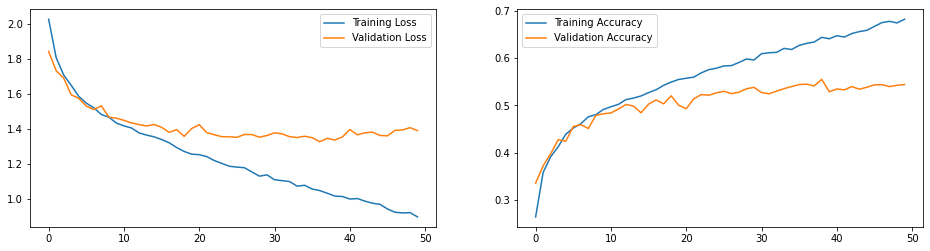

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 2B:** 


DNN with 3 layers (Tune final node)

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 3 layers are each fully connected Dense layers with varying nodes and use the `relu` activation function. We test out the optimal final node
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
def train_test_model(nodes_3):
  model = models.Sequential() 
  model.add(layers.Flatten(input_shape=(32,32,3)))
  model.add(layers.Dense(1024, activation='relu')) 
  model.add(layers.Dense(128, activation='relu')) 
  model.add(layers.Dense(nodes_3, activation='relu')) 
  model.add(layers.Dense(units=10, activation=tf.nn.softmax))

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'],
      )
  
  start = time()
  history = model.fit(train_images_norm
                      ,train_labels
                      ,epochs=50
                      ,batch_size=1024
                      ,validation_data=(val_images_norm,val_labels)
                      ,verbose=0
                      #,callbacks=[
                      #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                      #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                      #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                      )
  model_time = time() - start
  loss, accuracy = model.evaluate(test_images_norm, test_labels)
  preds = model.predict(test_images_norm)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
nodes_3 = [32, 64, 128, 256, 512, 1024]

In [ ]:
model = []
history = [] 
loss = []
accuracy = []
preds = []
model_time = []

for node_3 in nodes_3:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = train_test_model(node_3)
  model.append(model_temp)
  history.append(history_temp)
  loss.append(loss_temp)
  accuracy.append(accuracy_temp)
  preds.append(preds_temp)
  model_time.append(time_temp)
  final_val = history_temp.history['val_accuracy'][-1]
  final_loss = history_temp.history['val_loss'][-1]
  print(f'Validation set accuracy for 3rd Node {node_3} Model: {final_val * 100}')
  print(f'Validation set loss for 3rd Node {node_3} Model: {final_loss}')

In [ ]:
accuracy[1]

In [ ]:
model = model[1]
history = history[1] 
loss = loss[1]
accuracy = accuracy[1]
preds = preds[1]
model_time = model_time[1]

In [ ]:
model_time

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

# **EXPERIMENT 2E:** 


DNN with 2 layers (ADD L2 Regularization only)

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 512, 256 nodes (respectively) and use the `relu` activation function.
 * A L2 Regularization (NO L1) is added to see if this reduces overfitting
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
def train_test_model(l_2):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32,32,3)),
      tf.keras.layers.Dense(1024, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l_2)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l_2)),    
      tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l_2)),    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax),]
      )

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'],
      )
  
  start = time()
  history = model.fit(train_images_norm
                      ,train_labels
                      ,epochs=50
                      ,batch_size=1024
                      ,validation_data=(val_images_norm,val_labels)
                      ,verbose=0
                      #,callbacks=[
                      #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                      #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                      #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                      )
  model_time = time() - start
  loss, accuracy = model.evaluate(test_images_norm, test_labels)
  preds = model.predict(test_images_norm)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
l2_val = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001]

In [ ]:
model = []
history = [] 
loss = []
accuracy = []
preds = []
model_time = []

for l_2 in l2_val:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = train_test_model(l_2)
  model.append(model_temp)
  history.append(history_temp)
  loss.append(loss_temp)
  accuracy.append(accuracy_temp)
  preds.append(preds_temp)
  model_time.append(time_temp)
  final_val = history_temp.history['val_accuracy'][-1]
  final_loss = history_temp.history['val_loss'][-1]
  print(f'Validation set accuracy for L2 {l_2}: {final_val * 100}')
  print(f'Validation set loss for L2 {l_2}: {final_loss}')

### Model 2E[0]

In [ ]:
model_2e = model[0]
history_2e = history[0] 
loss_2e = loss[0]
accuracy_2e = accuracy[0]
preds_2e = preds[0]
model_time_2e = model_time[0]

In [ ]:
model_time_2e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_2e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_2e.history['loss']
accs = history_2e.history['accuracy']
val_losses = history_2e.history['val_loss']
val_accs = history_2e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 2E[1]

In [ ]:
model_2e = model[1]
history_2e = history[1] 
loss_2e = loss[1]
accuracy_2e = accuracy[1]
preds_2e = preds[1]
model_time_2e = model_time[1]

In [ ]:
model_time_2e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_2e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_2e.history['loss']
accs = history_2e.history['accuracy']
val_losses = history_2e.history['val_loss']
val_accs = history_2e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 2E[2]

In [ ]:
model_2e = model[2]
history_2e = history[2] 
loss_2e = loss[2]
accuracy_2e = accuracy[2]
preds_2e = preds[2]
model_time_2e = model_time[2]

In [ ]:
model_time_2e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_2e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_2e.history['loss']
accs = history_2e.history['accuracy']
val_losses = history_2e.history['val_loss']
val_accs = history_2e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 2E[3]

In [ ]:
model_2e = model[3]
history_2e = history[3] 
loss_2e = loss[3]
accuracy_2e = accuracy[3]
preds_2e = preds[3]
model_time_2e = model_time[3]

In [ ]:
model_time_2e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_2e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_2e.history['loss']
accs = history_2e.history['accuracy']
val_losses = history_2e.history['val_loss']
val_accs = history_2e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 2E[4]

In [ ]:
model_2e = model[4]
history_2e = history[4] 
loss_2e = loss[4]
accuracy_2e = accuracy[4]
preds_2e = preds[4]
model_time_2e = model_time[4]

In [ ]:
model_time_2e

### Plotting Performance Metrics 

In [ ]:
history_dict = history_2e.history
history_dict.keys()

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

In [ ]:
losses = history_2e.history['loss']
accs = history_2e.history['accuracy']
val_losses = history_2e.history['val_loss']
val_accs = history_2e.history['val_accuracy']
epochs = len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

# **EXPERIMENT 2-FINAL:** 


DNN with 3 layers (with L2 regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 3 layers are each fully connected Dense layers with 1024, 128, 64 nodes (respectively) and use the `relu` activation function.
 * A L2 Regularization (NO L1) is added with L2=0.001 reduce overfitting
* The final layer outputs 10 probability results, using the `softmax` activiation function.  
* No Early Stopping callback

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_137 (Dense)            (None, 256)               786688    
_________________________________________________________________
dense_138 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_139 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_140 (Dense)            (None, 10)                1290      
Total params: 886,666
Trainable params: 886,666
Non-trainable params: 0
_________________________________________________________________


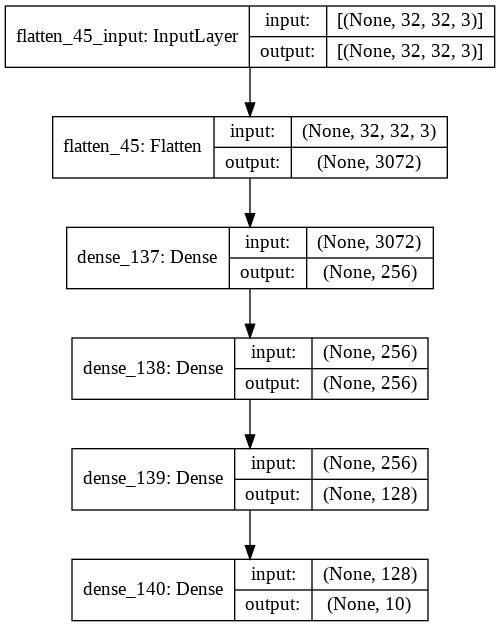

In [ ]:
keras.utils.plot_model(model, "CIFAR10_2F.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_2/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                          
                    )
model_time = time() - start

Epoch 1/50
46/46 [==============================] - 1s 14ms/step - loss: 3.9213 - accuracy: 0.2383 - val_loss: 3.0863 - val_accuracy: 0.3367
Epoch 2/50
46/46 [==============================] - 0s 10ms/step - loss: 2.7936 - accuracy: 0.3402 - val_loss: 2.5024 - val_accuracy: 0.3673
Epoch 3/50
46/46 [==============================] - 0s 10ms/step - loss: 2.3932 - accuracy: 0.3708 - val_loss: 2.2619 - val_accuracy: 0.3817
Epoch 4/50
46/46 [==============================] - 0s 9ms/step - loss: 2.1977 - accuracy: 0.3915 - val_loss: 2.1206 - val_accuracy: 0.3973
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 2.0883 - accuracy: 0.4050 - val_loss: 2.0175 - val_accuracy: 0.4167
Epoch 6/50
46/46 [==============================] - 0s 10ms/step - loss: 2.0099 - accuracy: 0.4145 - val_loss: 1.9608 - val_accuracy: 0.4233
Epoch 7/50
46/46 [==============================] - 0s 9ms/step - loss: 1.9419 - accuracy: 0.4306 - val_loss: 1.9123 - val_accuracy: 0.4250
Epoch 8/50
46/4

## Evaluate the model

In [ ]:
model_time

41.64846110343933

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.5879 - accuracy: 0.5017
test set accuracy:  50.16999840736389
test set loss:  1.587906002998352


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
45  1.529     0.518     1.577         0.502
46  1.524     0.522     1.570         0.502
47  1.514     0.523     1.556         0.514
48  1.523     0.522     1.556         0.515
49  1.503     0.527     1.555         0.518

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

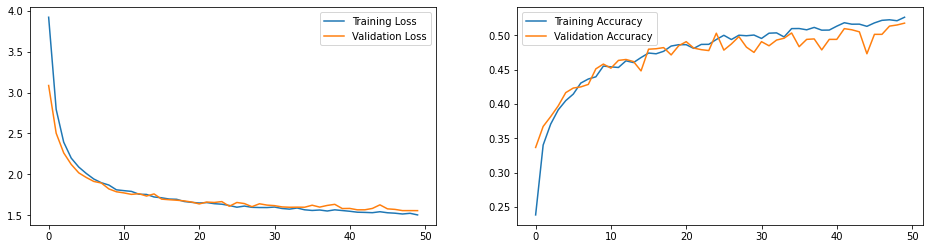

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

# **EXPERIMENT 3:** 


CNN with 2 convolution/max pooling layers (no regularization)



## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu))#,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

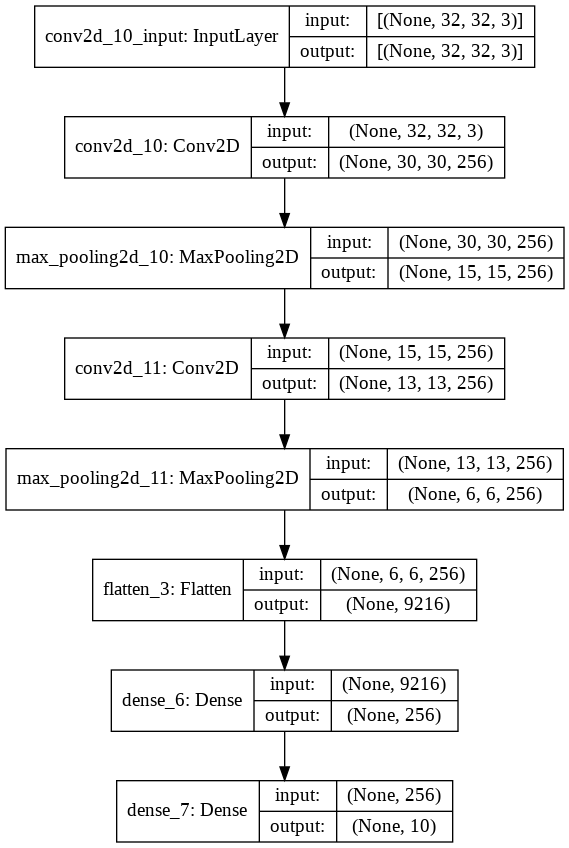

In [ ]:
keras.utils.plot_model(model, "CIFAR10_3.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_3/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 16s 273ms/step - loss: 1.8512 - accuracy: 0.3311 - val_loss: 1.4709 - val_accuracy: 0.4740
Epoch 2/200
46/46 [==============================] - 7s 157ms/step - loss: 1.3968 - accuracy: 0.5033 - val_loss: 1.2638 - val_accuracy: 0.5603
Epoch 3/200
46/46 [==============================] - 7s 155ms/step - loss: 1.2325 - accuracy: 0.5684 - val_loss: 1.1513 - val_accuracy: 0.6053
Epoch 4/200
46/46 [==============================] - 7s 153ms/step - loss: 1.1244 - accuracy: 0.6079 - val_loss: 1.0893 - val_accuracy: 0.6183
Epoch 5/200
46/46 [==============================] - 7s 152ms/step - loss: 1.0517 - accuracy: 0.6352 - val_loss: 1.0094 - val_accuracy: 0.6513
Epoch 6/200
46/46 [==============================] - 7s 151ms/step - loss: 0.9746 - accuracy: 0.6643 - val_loss: 0.9423 - val_accuracy: 0.6743
Epoch 7/200
46/46 [==============================] - 7s 151ms/step - loss: 0.9304 - accuracy: 0.6791 - val_loss: 0.9510 - val_accuracy: 0.674

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

121.13268494606018

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.8942 - accuracy: 0.7005
test set accuracy:  70.05000114440918
test set loss:  0.8942210674285889


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
12  0.750     0.743     0.851         0.715
13  0.729     0.751     0.827         0.723
14  0.706     0.756     0.826         0.712
15  0.672     0.770     0.830         0.717
16  0.668     0.770     0.847         0.703

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

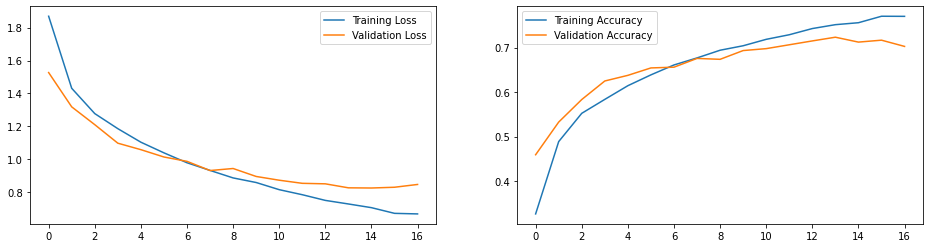

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[736,   7,  54,   7,  17,   5,   6,   9,  94,  65],
       [ 24, 707,  18,   7,   6,   3,   3,   4,  50, 178],
       [ 58,   6, 583,  40, 144,  60,  26,  40,  18,  25],
       [ 20,   7,  84, 511, 114, 134,  22,  49,  33,  26],
       [ 13,   1,  57,  36, 759,  19,  12,  72,  25,   6],
       [ 14,   2,  73, 146,  71, 581,   6,  68,  23,  16],
       [  8,   5,  71,  67, 149,  23, 627,  10,  20,  20],
       [ 12,   1,  33,  14,  80,  50,   1, 772,   6,  31],
       [ 52,  18,  12,   8,   6,   5,   0,   3, 852,  44],
       [ 23,  22,  11,   6,  10,   6,   0,  12,  33, 877]], dtype=int32)>

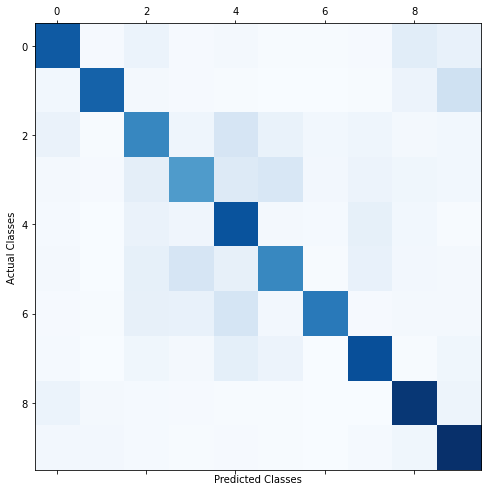

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 3R:** 


CNN with 2 convolution/max pooling layers (with L2 regularization)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2359552   
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

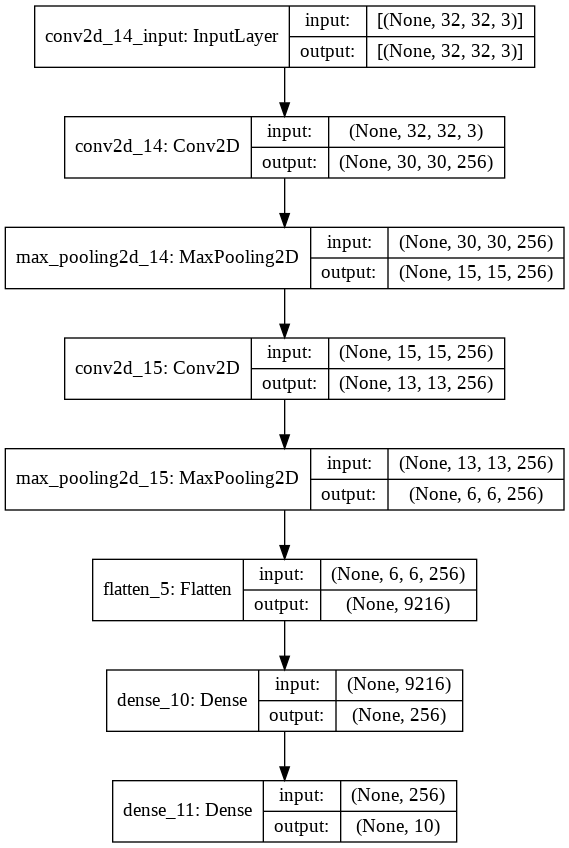

In [ ]:
keras.utils.plot_model(model, "CIFAR10_3R.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_3R/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 8s 155ms/step - loss: 2.2956 - accuracy: 0.3131 - val_loss: 1.6669 - val_accuracy: 0.4463
Epoch 2/200
46/46 [==============================] - 7s 153ms/step - loss: 1.5755 - accuracy: 0.4807 - val_loss: 1.4540 - val_accuracy: 0.5323
Epoch 3/200
46/46 [==============================] - 7s 155ms/step - loss: 1.4116 - accuracy: 0.5441 - val_loss: 1.3467 - val_accuracy: 0.5640
Epoch 4/200
46/46 [==============================] - 7s 154ms/step - loss: 1.3076 - accuracy: 0.5824 - val_loss: 1.2353 - val_accuracy: 0.6010
Epoch 5/200
46/46 [==============================] - 7s 153ms/step - loss: 1.2335 - accuracy: 0.6087 - val_loss: 1.2088 - val_accuracy: 0.6143
Epoch 6/200
46/46 [==============================] - 7s 153ms/step - loss: 1.1781 - accuracy: 0.6309 - val_loss: 1.1557 - val_accuracy: 0.6347
Epoch 7/200
46/46 [==============================] - 7s 152ms/step - loss: 1.1252 - accuracy: 0.6478 - val_loss: 1.1140 - val_accuracy: 0.6543

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

128.6265971660614

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 2s 4ms/step - loss: 1.0248 - accuracy: 0.6944
test set accuracy:  69.44000124931335
test set loss:  1.0247849225997925


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
13  0.956     0.716     1.019         0.687
14  0.929     0.724     0.951         0.718
15  0.922     0.732     0.975         0.709
16  0.898     0.737     0.974         0.709
17  0.877     0.747     0.989         0.699

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

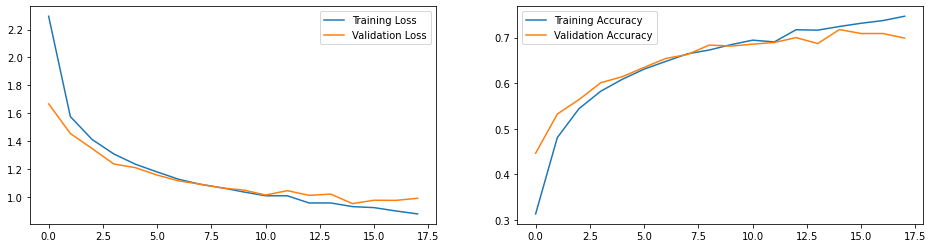

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[725,  18,  62,   7,  31,   4,  23,   2,  79,  49],
       [ 17, 814,  11,   3,   5,   0,  25,   1,  29,  95],
       [ 59,   6, 577,  47, 105,  35, 128,  19,  14,  10],
       [ 13,  16,  71, 467, 107,  64, 198,  18,  22,  24],
       [ 15,   3,  57,  37, 731,   4, 113,  20,  14,   6],
       [ 19,   5,  81, 204, 100, 433, 114,  26,  10,   8],
       [  2,   1,  32,  15,  27,   3, 909,   3,   4,   4],
       [ 19,   4,  41,  34, 138,  28,  34, 662,   4,  36],
       [ 51,  35,  13,  12,  14,   2,  16,   3, 821,  33],
       [ 21,  82,  10,  12,  11,   1,  23,   4,  31, 805]], dtype=int32)>

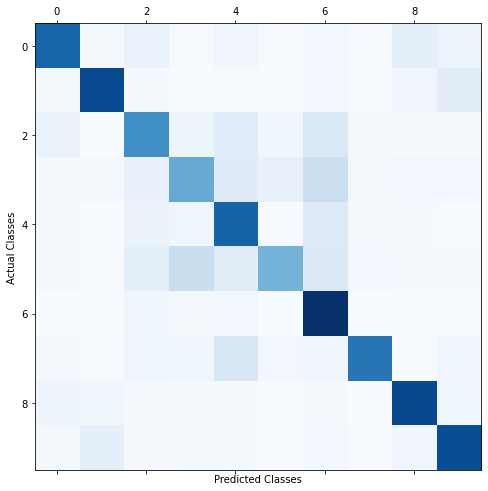

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Predictions

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

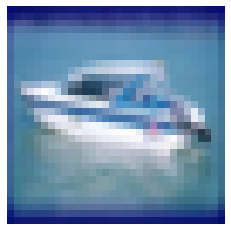

In [ ]:
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[2021]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

In [ ]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
len(activations)

7

In [ ]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d_14',
 'max_pooling2d_14',
 'conv2d_15',
 'max_pooling2d_15',
 'flatten_5',
 'dense_10',
 'dense_11']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


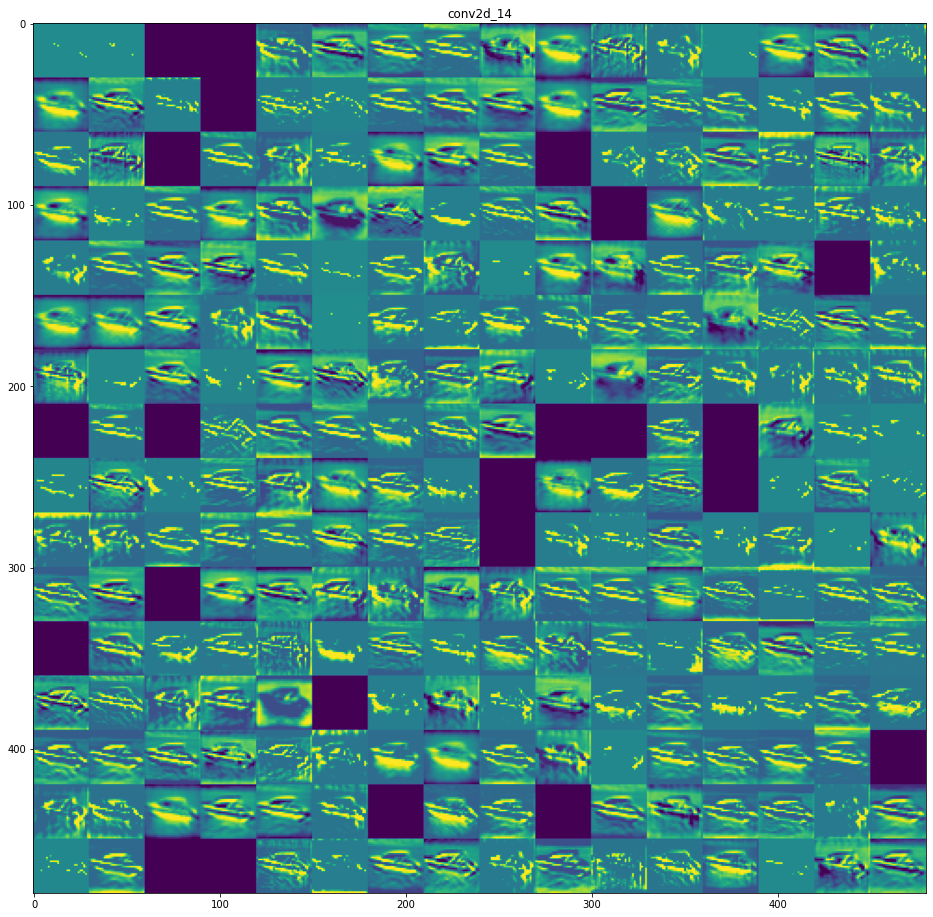

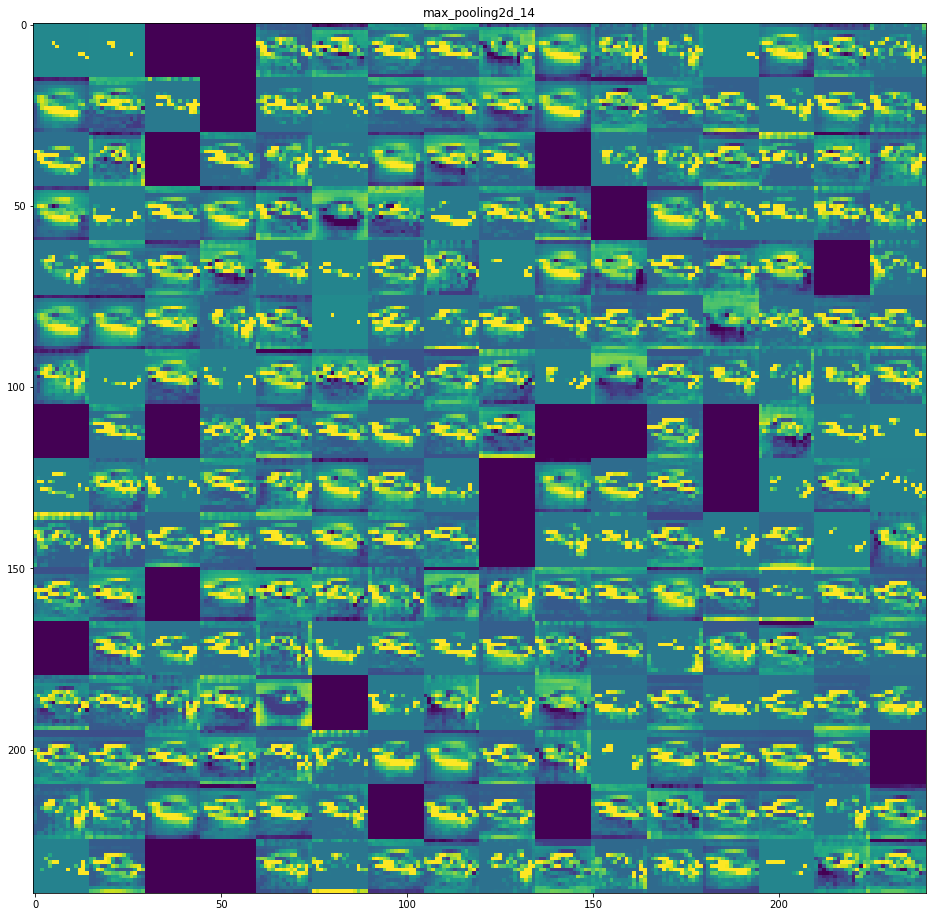

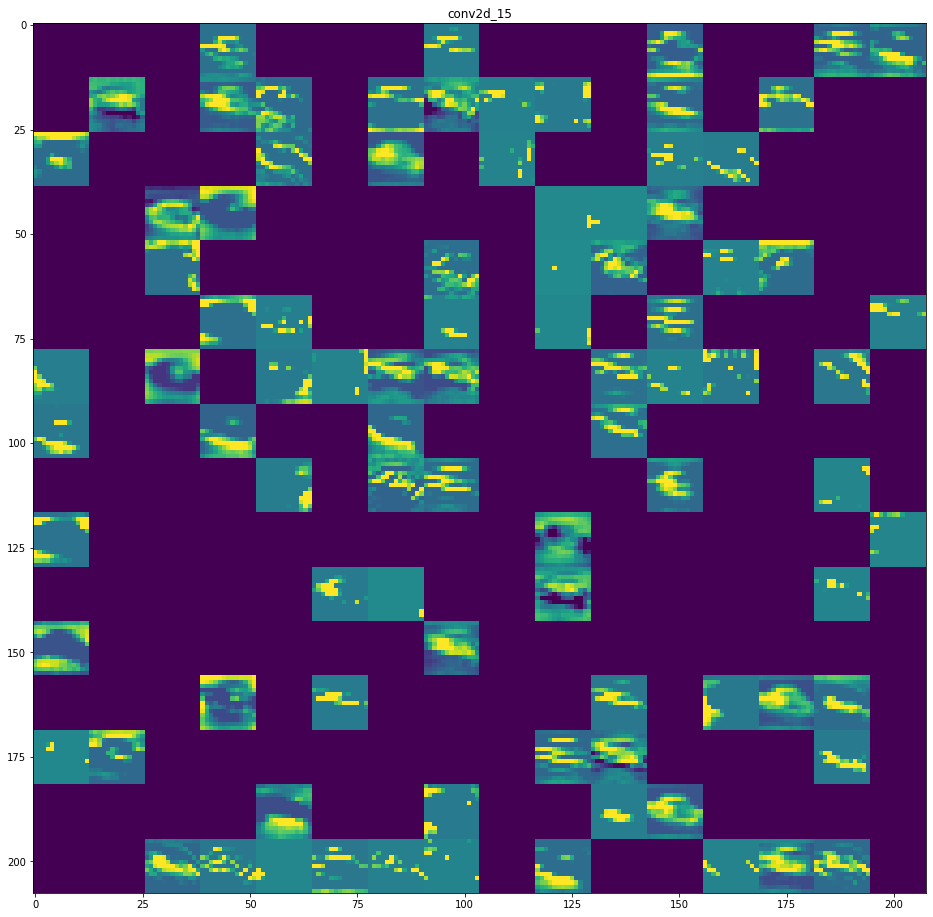

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();

# **EXPERIMENT 4:** 


CNN with 3 convolution/max pooling layers (no regularization)



## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu))#,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         590080    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)             

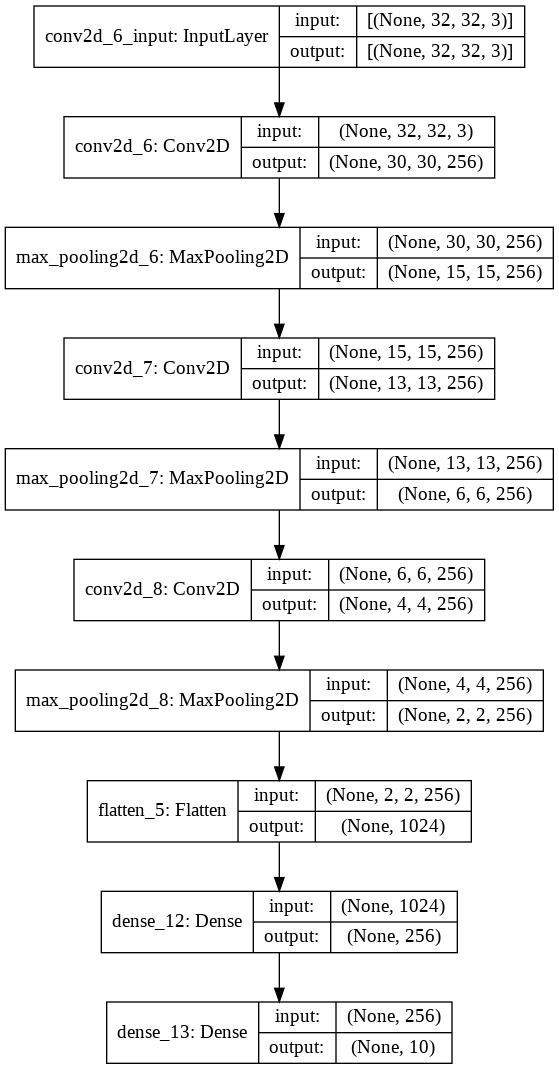

In [ ]:
keras.utils.plot_model(model, "CIFAR10_4.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 10s 189ms/step - loss: 2.0018 - accuracy: 0.2587 - val_loss: 1.7444 - val_accuracy: 0.3730
Epoch 2/200
46/46 [==============================] - 7s 162ms/step - loss: 1.5956 - accuracy: 0.4220 - val_loss: 1.4677 - val_accuracy: 0.4727
Epoch 3/200
46/46 [==============================] - 8s 165ms/step - loss: 1.4122 - accuracy: 0.4928 - val_loss: 1.3091 - val_accuracy: 0.5317
Epoch 4/200
46/46 [==============================] - 8s 166ms/step - loss: 1.2962 - accuracy: 0.5385 - val_loss: 1.2368 - val_accuracy: 0.5603
Epoch 5/200
46/46 [==============================] - 8s 165ms/step - loss: 1.2048 - accuracy: 0.5755 - val_loss: 1.1687 - val_accuracy: 0.5950
Epoch 6/200
46/46 [==============================] - 8s 165ms/step - loss: 1.1407 - accuracy: 0.5991 - val_loss: 1.0873 - val_accuracy: 0.6190
Epoch 7/200
46/46 [==============================] - 7s 163ms/step - loss: 1.0649 - accuracy: 0.6309 - val_loss: 1.0573 - val_accuracy: 0.634

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

228.7455358505249

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.9039 - accuracy: 0.7209
test set accuracy:  72.08999991416931
test set loss:  0.9039499163627625


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
25  0.492     0.833     0.792         0.740
26  0.477     0.838     0.775         0.740
27  0.455     0.844     0.822         0.735
28  0.434     0.852     0.842         0.733
29  0.415     0.861     0.849         0.735

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

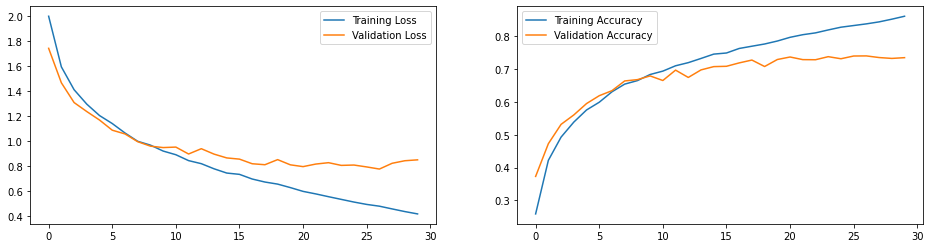

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[836,  10,  21,   6,  26,   4,  15,   3,  57,  22],
       [ 51, 779,   7,   6,   7,   0,  14,   6,  56,  74],
       [ 99,   6, 599,  54, 104,  39,  57,  22,  15,   5],
       [ 38,  14,  79, 524,  99, 111,  73,  23,  25,  14],
       [ 22,   3,  55,  36, 776,  19,  42,  31,  14,   2],
       [ 18,   7,  65, 189,  90, 543,  28,  42,   4,  14],
       [ 13,   6,  34,  42,  50,  11, 829,   4,   9,   2],
       [ 38,   6,  52,  33, 105,  36,   8, 706,   3,  13],
       [ 81,  18,  10,   7,  14,   4,   3,   1, 837,  25],
       [ 54,  68,   6,  14,  12,   2,   7,  11,  46, 780]], dtype=int32)>

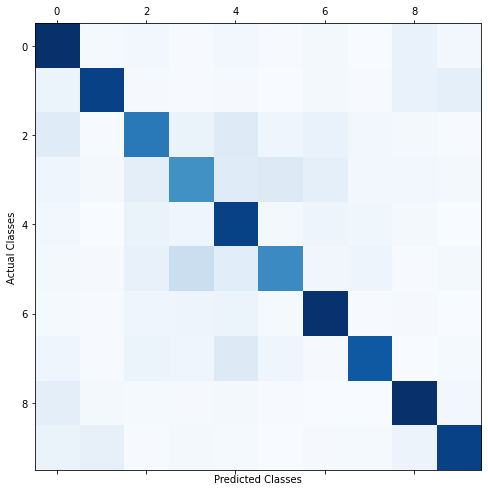

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 4R:** 


CNN with 3 convolution/max pooling layers (with L2 regularization)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)             

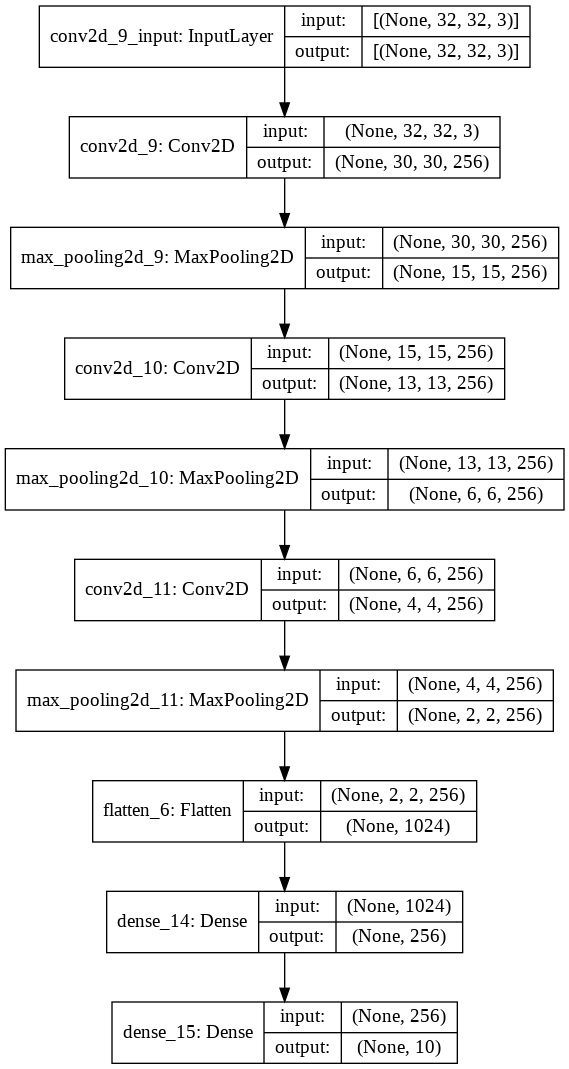

In [ ]:
keras.utils.plot_model(model, "CIFAR10_4R.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4R/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 8s 164ms/step - loss: 2.6161 - accuracy: 0.2616 - val_loss: 2.0649 - val_accuracy: 0.3390
Epoch 2/200
46/46 [==============================] - 8s 165ms/step - loss: 1.8005 - accuracy: 0.4264 - val_loss: 1.6425 - val_accuracy: 0.4727
Epoch 3/200
46/46 [==============================] - 8s 166ms/step - loss: 1.5459 - accuracy: 0.4986 - val_loss: 1.4342 - val_accuracy: 0.5407
Epoch 4/200
46/46 [==============================] - 8s 168ms/step - loss: 1.4204 - accuracy: 0.5453 - val_loss: 1.3480 - val_accuracy: 0.5577
Epoch 5/200
46/46 [==============================] - 8s 167ms/step - loss: 1.3289 - accuracy: 0.5745 - val_loss: 1.2449 - val_accuracy: 0.6107
Epoch 6/200
46/46 [==============================] - 8s 166ms/step - loss: 1.2386 - accuracy: 0.6041 - val_loss: 1.2392 - val_accuracy: 0.6043
Epoch 7/200
46/46 [==============================] - 8s 164ms/step - loss: 1.1923 - accuracy: 0.6185 - val_loss: 1.1552 - val_accuracy: 0.6303

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

198.3569540977478

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.9056 - accuracy: 0.7183
test set accuracy:  71.82999849319458
test set loss:  0.9055761694908142


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
21  0.709     0.782     0.865         0.727
22  0.670     0.797     0.833         0.740
23  0.663     0.798     0.908         0.713
24  0.657     0.801     0.841         0.740
25  0.625     0.813     0.863         0.728

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

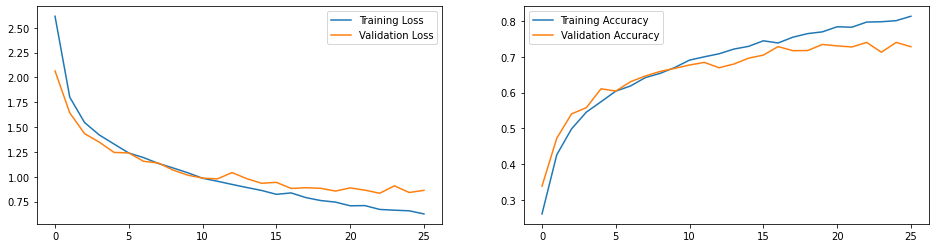

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[664,  16,  95,  14,  16,   3,  19,   7, 146,  20],
       [ 22, 792,  18,  10,   5,   2,  27,   7,  66,  51],
       [ 35,   2, 694,  52,  52,  51,  69,  19,  22,   4],
       [ 15,   3, 116, 534,  51, 139,  80,  28,  29,   5],
       [ 10,   2, 103,  57, 637,  36,  80,  47,  25,   3],
       [ 10,   1,  90, 167,  40, 616,  30,  36,   7,   3],
       [  1,   2,  63,  35,  12,  11, 861,   4,   8,   3],
       [ 12,   1,  57,  46,  61,  68,  13, 727,   8,   7],
       [ 16,  12,  19,   7,   2,   4,   8,   2, 921,   9],
       [ 30,  51,  32,  16,   1,  10,  15,  19,  89, 737]], dtype=int32)>

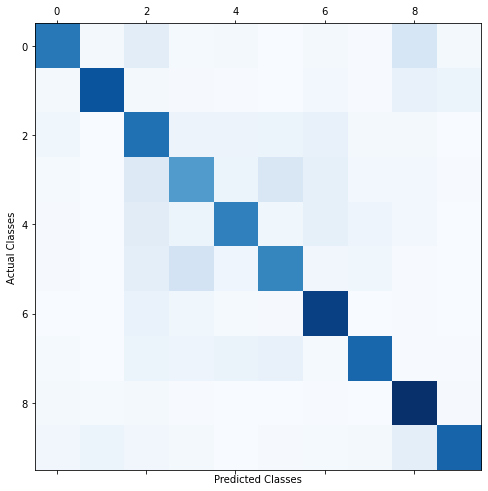

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 4R2:** 


CNN with 3 convolution/max pooling layers (with Drop Out regularization)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 256)        

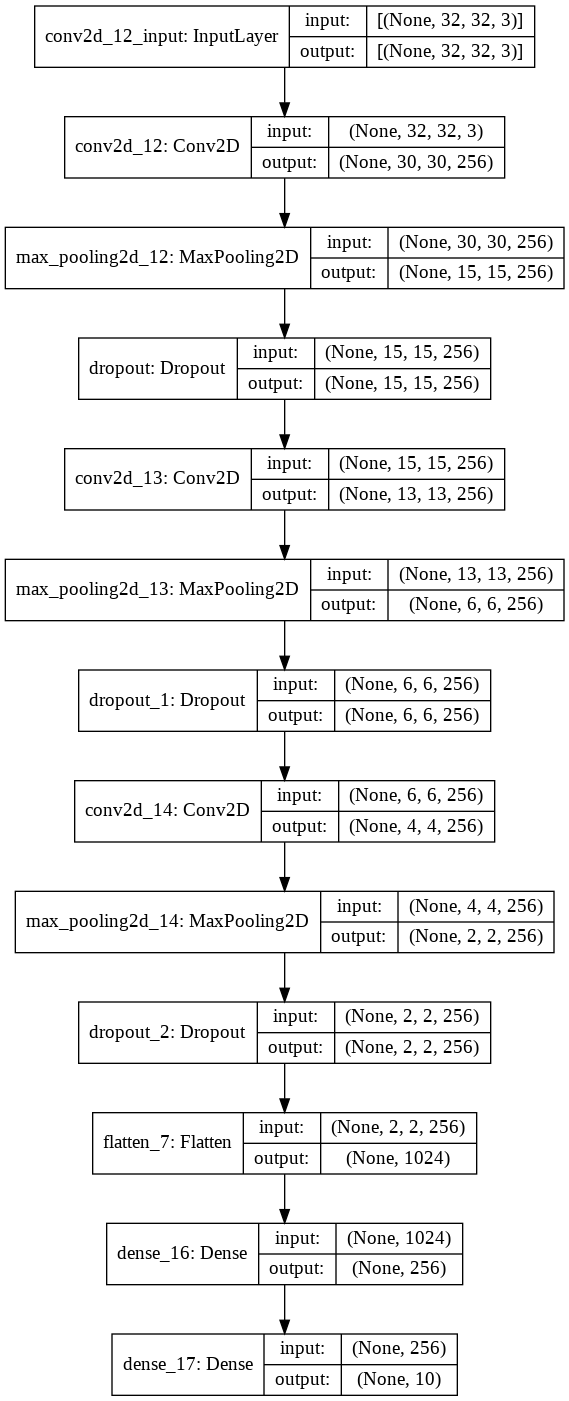

In [ ]:
keras.utils.plot_model(model, "CIFAR10_4R2.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4R2/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 9s 181ms/step - loss: 2.6018 - accuracy: 0.2729 - val_loss: 2.0162 - val_accuracy: 0.3903
Epoch 2/200
46/46 [==============================] - 8s 178ms/step - loss: 1.8282 - accuracy: 0.4201 - val_loss: 1.6111 - val_accuracy: 0.4853
Epoch 3/200
46/46 [==============================] - 8s 179ms/step - loss: 1.5958 - accuracy: 0.4805 - val_loss: 1.4738 - val_accuracy: 0.5267
Epoch 4/200
46/46 [==============================] - 8s 179ms/step - loss: 1.4495 - accuracy: 0.5270 - val_loss: 1.3730 - val_accuracy: 0.5640
Epoch 5/200
46/46 [==============================] - 8s 180ms/step - loss: 1.3562 - accuracy: 0.5565 - val_loss: 1.2792 - val_accuracy: 0.5927
Epoch 6/200
46/46 [==============================] - 8s 180ms/step - loss: 1.2898 - accuracy: 0.5765 - val_loss: 1.1766 - val_accuracy: 0.6290
Epoch 7/200
46/46 [==============================] - 8s 180ms/step - loss: 1.2065 - accuracy: 0.6055 - val_loss: 1.1075 - val_accuracy: 0.6580

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

258.37266087532043

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 5ms/step - loss: 0.7601 - accuracy: 0.7622
test set accuracy:  76.21999979019165
test set loss:  0.7600672245025635


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
26  0.676     0.787     0.727         0.773
27  0.669     0.790     0.698         0.789
28  0.658     0.795     0.706         0.785
29  0.654     0.795     0.698         0.786
30  0.635     0.802     0.708         0.777

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

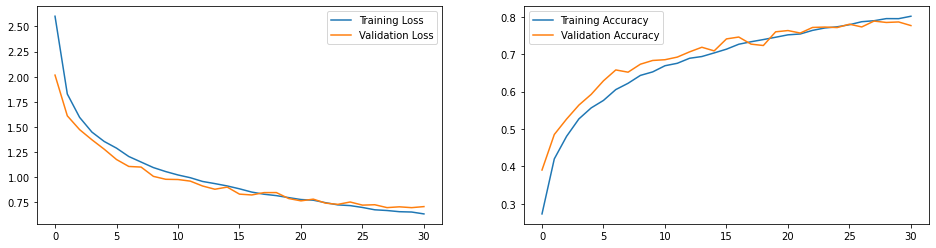

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[847,  12,  26,  30,  12,   2,   5,   8,  39,  19],
       [ 36, 842,   9,  18,   2,   6,   7,   4,  29,  47],
       [ 66,   3, 642, 106,  60,  43,  49,  18,   8,   5],
       [ 17,   4,  45, 753,  30,  86,  28,  23,   5,   9],
       [ 13,   2,  52, 115, 711,  16,  36,  49,   5,   1],
       [ 10,   3,  42, 266,  29, 602,   8,  35,   0,   5],
       [  5,   3,  35, 103,  29,  10, 807,   2,   4,   2],
       [ 20,   0,  18,  80,  49,  47,   5, 776,   1,   4],
       [ 84,  18,   8,  31,   3,   3,   4,   3, 830,  16],
       [ 34,  61,  10,  31,   4,   5,   6,  14,  23, 812]], dtype=int32)>

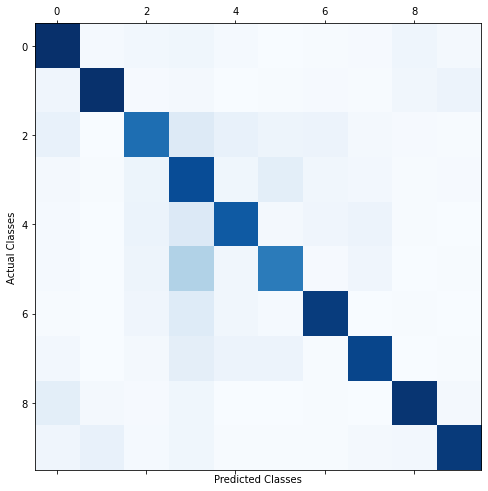

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 5:** 


CNN with 3 convolution/max pooling layers, increasing in size (with L2 regularization and Drop Out)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 3 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 256)        

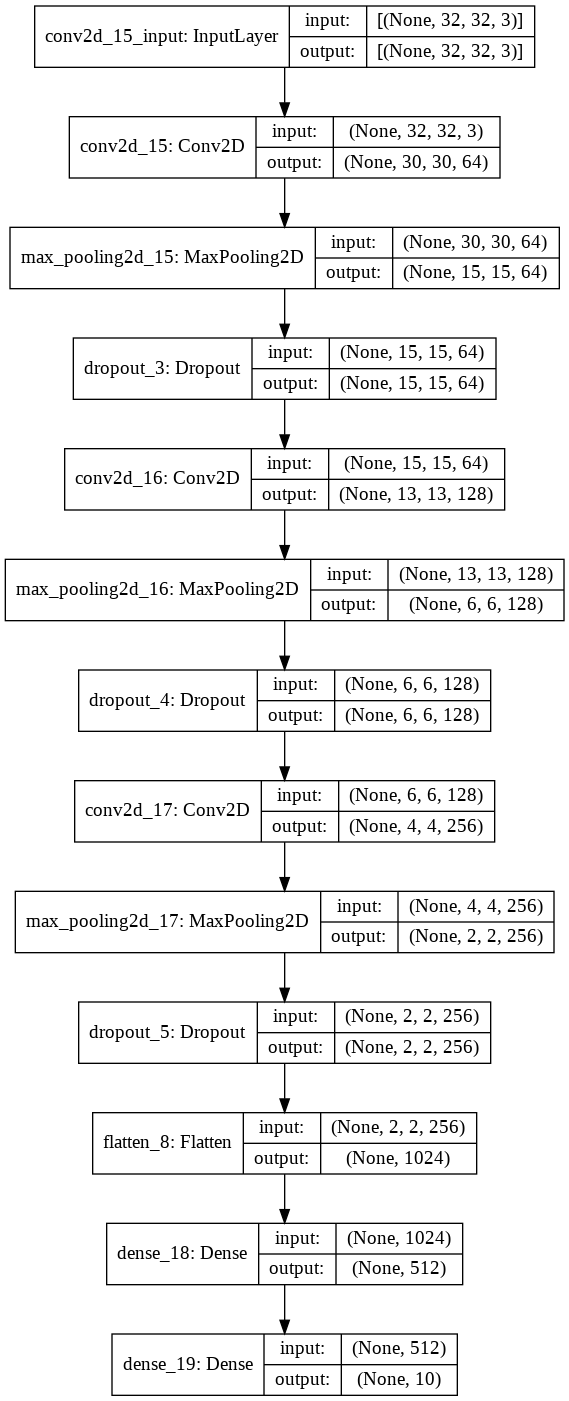

In [ ]:
keras.utils.plot_model(model, "CIFAR10_4R.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_5/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 7s 108ms/step - loss: 2.9290 - accuracy: 0.2653 - val_loss: 2.1322 - val_accuracy: 0.3553
Epoch 2/200
46/46 [==============================] - 3s 67ms/step - loss: 1.8869 - accuracy: 0.3961 - val_loss: 1.6831 - val_accuracy: 0.4570
Epoch 3/200
46/46 [==============================] - 3s 68ms/step - loss: 1.6174 - accuracy: 0.4650 - val_loss: 1.4994 - val_accuracy: 0.5000
Epoch 4/200
46/46 [==============================] - 3s 67ms/step - loss: 1.4742 - accuracy: 0.5094 - val_loss: 1.3813 - val_accuracy: 0.5373
Epoch 5/200
46/46 [==============================] - 3s 68ms/step - loss: 1.3846 - accuracy: 0.5351 - val_loss: 1.2993 - val_accuracy: 0.5727
Epoch 6/200
46/46 [==============================] - 3s 68ms/step - loss: 1.3147 - accuracy: 0.5609 - val_loss: 1.2122 - val_accuracy: 0.5937
Epoch 7/200
46/46 [==============================] - 3s 68ms/step - loss: 1.2597 - accuracy: 0.5794 - val_loss: 1.1818 - val_accuracy: 0.6200
Epoch

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

88.78200244903564

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.8534 - accuracy: 0.7352
test set accuracy:  73.51999878883362
test set loss:  0.8533704876899719


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
22  0.865     0.725     0.831         0.741
23  0.841     0.732     0.807         0.753
24  0.831     0.737     0.834         0.737
25  0.825     0.737     0.796         0.750
26  0.813     0.745     0.808         0.744

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

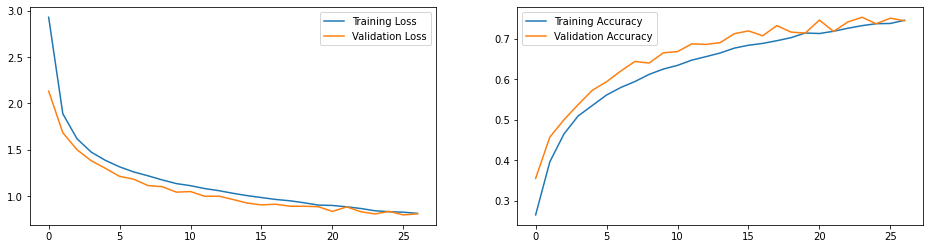

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[729,  55,  52,  15,  10,   3,  10,   9,  93,  24],
       [  7, 922,   3,   6,   1,   1,   8,   3,  18,  31],
       [ 57,  10, 727,  61,  37,  27,  44,  15,  13,   9],
       [ 10,  15,  99, 657,  34,  87,  42,  32,   8,  16],
       [ 18,  11, 142,  80, 589,  28,  53,  63,  11,   5],
       [ 11,  13,  97, 226,  25, 555,  16,  41,   6,  10],
       [  2,  11,  80,  63,  19,   5, 799,   5,   9,   7],
       [ 15,  10,  46,  58,  39,  39,   8, 765,   3,  17],
       [ 34,  53,  11,  14,   3,   4,   2,   3, 851,  25],
       [ 12, 158,  12,  12,   4,   3,  10,   4,  27, 758]], dtype=int32)>

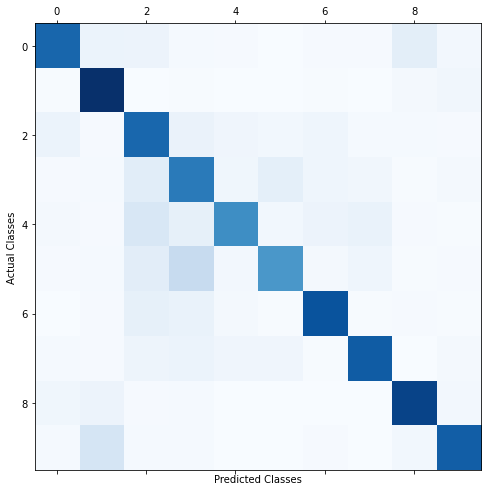

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

# **EXPERIMENT 6:** 


CNN with 3 convolution/max pooling layers (with Drop Out regularization). Add Padding


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 256)        

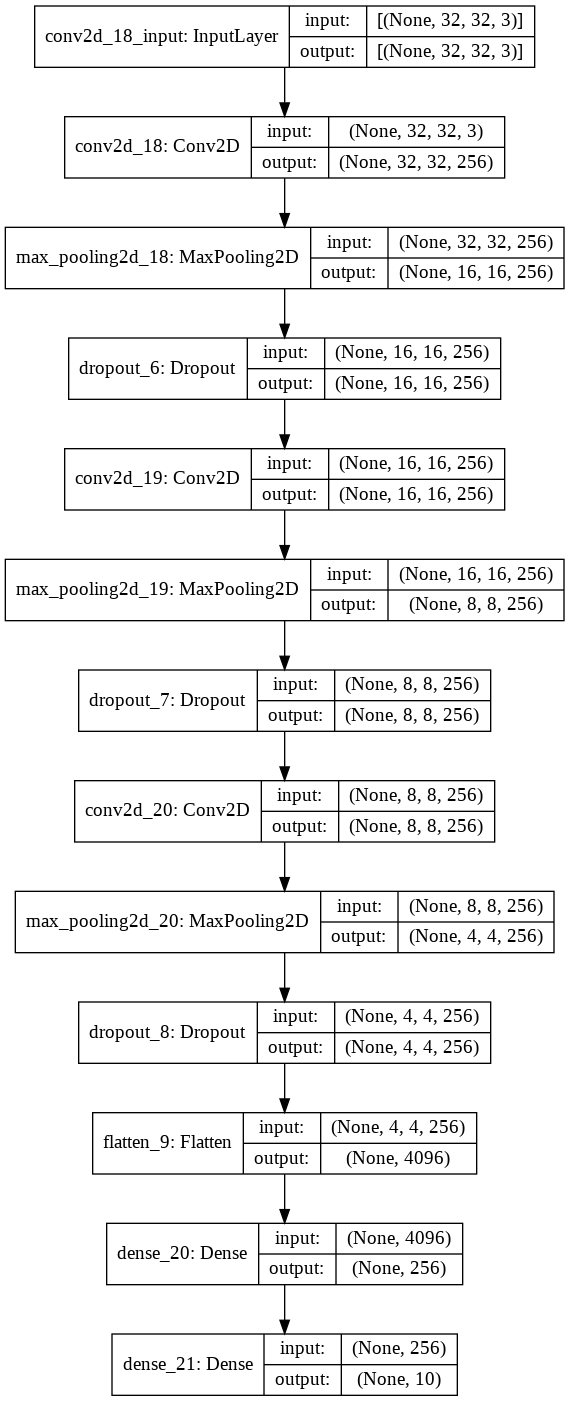

In [ ]:
keras.utils.plot_model(model, "CIFAR10_4R2.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4R2/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 24s 397ms/step - loss: 2.5812 - accuracy: 0.2519 - val_loss: 1.8665 - val_accuracy: 0.3933
Epoch 2/200
46/46 [==============================] - 9s 207ms/step - loss: 1.7568 - accuracy: 0.4116 - val_loss: 1.5674 - val_accuracy: 0.4790
Epoch 3/200
46/46 [==============================] - 10s 207ms/step - loss: 1.5317 - accuracy: 0.4814 - val_loss: 1.4187 - val_accuracy: 0.5247
Epoch 4/200
46/46 [==============================] - 9s 207ms/step - loss: 1.3870 - accuracy: 0.5395 - val_loss: 1.2589 - val_accuracy: 0.5850
Epoch 5/200
46/46 [==============================] - 9s 206ms/step - loss: 1.2901 - accuracy: 0.5775 - val_loss: 1.1703 - val_accuracy: 0.6230
Epoch 6/200
46/46 [==============================] - 9s 205ms/step - loss: 1.1957 - accuracy: 0.6135 - val_loss: 1.1363 - val_accuracy: 0.6377
Epoch 7/200
46/46 [==============================] - 9s 205ms/step - loss: 1.1467 - accuracy: 0.6287 - val_loss: 1.0563 - val_accuracy: 0.66

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

254.018404006958

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.8152 - accuracy: 0.7722
test set accuracy:  77.21999883651733
test set loss:  0.8152416348457336


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
20  0.738     0.786     0.792         0.776
21  0.722     0.794     0.770         0.784
22  0.700     0.801     0.799         0.773
23  0.691     0.805     0.775         0.777
24  0.694     0.808     0.782         0.784

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

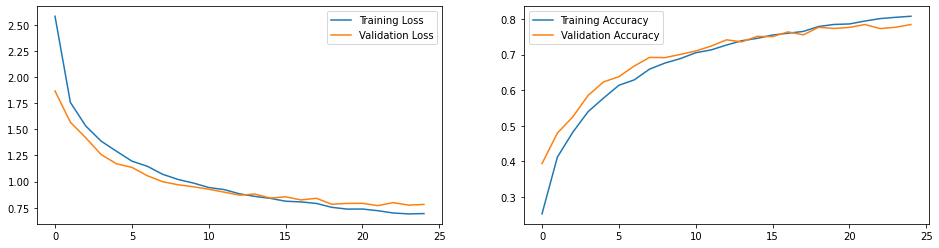

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[859,  11,  21,  12,  15,   5,  15,  11,  38,  13],
       [ 21, 859,  11,   7,   6,   4,  17,   2,  31,  42],
       [ 75,   2, 663,  40,  80,  35,  74,  20,   8,   3],
       [ 21,   5,  64, 589,  64, 135,  81,  24,   8,   9],
       [ 15,   2,  59,  44, 755,  22,  52,  45,   6,   0],
       [ 17,   1,  51, 155,  50, 643,  30,  44,   6,   3],
       [  6,   1,  27,  31,  21,  11, 895,   1,   6,   1],
       [ 18,   1,  39,  24,  56,  34,  11, 810,   1,   6],
       [ 62,  15,  14,  14,  14,   5,   6,   3, 854,  13],
       [ 40,  62,  17,  18,   5,   5,  15,  15,  28, 795]], dtype=int32)>

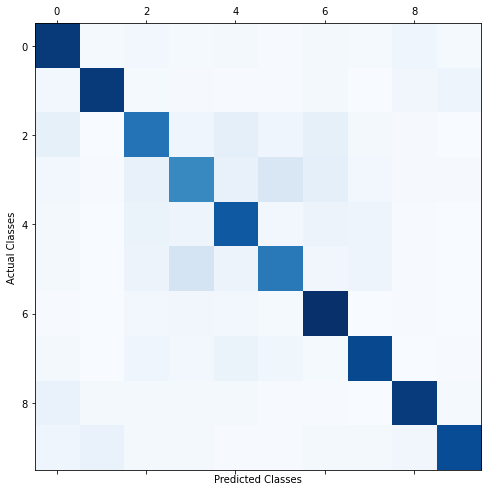

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 7:** 


CNN with 4 convolution/max pooling layers (with Drop Out regularization). Add Padding


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 256)       

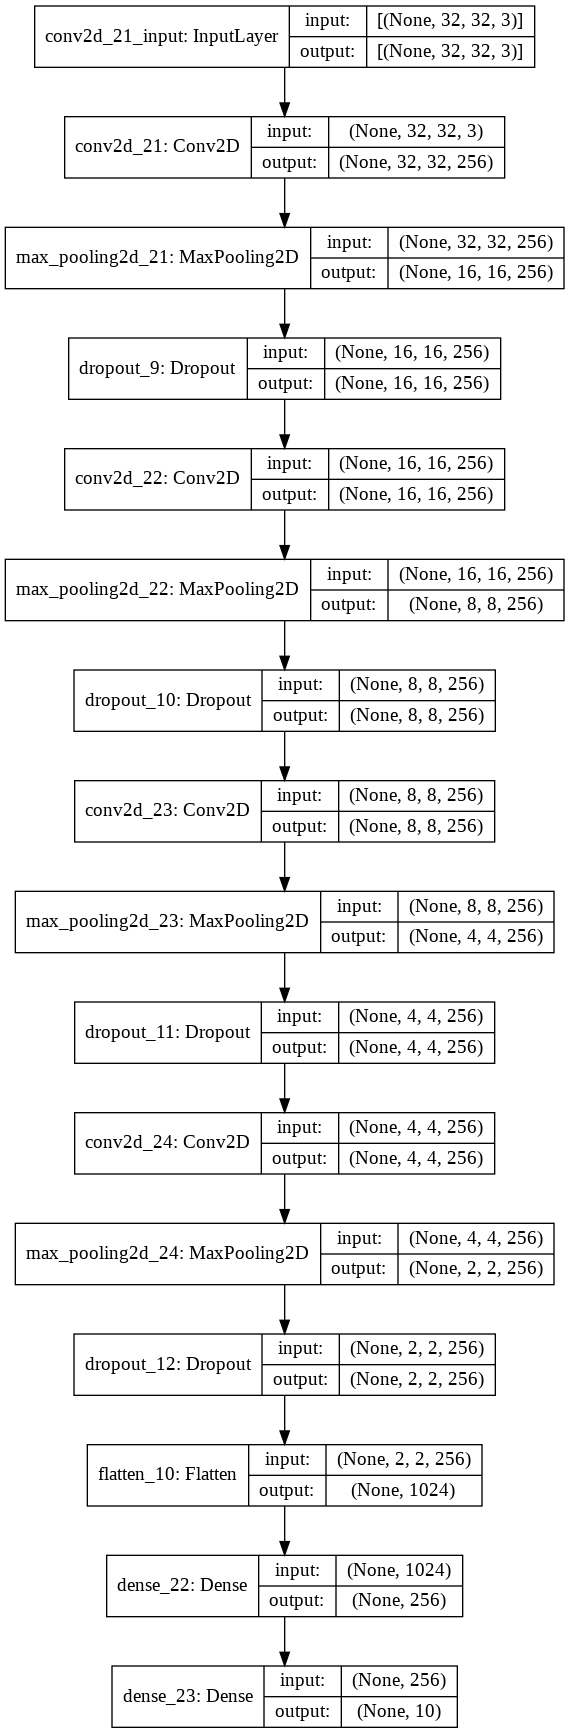

In [ ]:
keras.utils.plot_model(model, "CIFAR10_7.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_7/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 13s 243ms/step - loss: 2.6551 - accuracy: 0.2376 - val_loss: 1.9992 - val_accuracy: 0.3673
Epoch 2/200
46/46 [==============================] - 10s 212ms/step - loss: 1.8238 - accuracy: 0.3935 - val_loss: 1.5951 - val_accuracy: 0.4657
Epoch 3/200
46/46 [==============================] - 10s 214ms/step - loss: 1.5486 - accuracy: 0.4789 - val_loss: 1.3866 - val_accuracy: 0.5347
Epoch 4/200
46/46 [==============================] - 10s 214ms/step - loss: 1.3847 - accuracy: 0.5353 - val_loss: 1.2460 - val_accuracy: 0.5773
Epoch 5/200
46/46 [==============================] - 10s 214ms/step - loss: 1.2728 - accuracy: 0.5744 - val_loss: 1.1423 - val_accuracy: 0.6200
Epoch 6/200
46/46 [==============================] - 10s 217ms/step - loss: 1.1560 - accuracy: 0.6149 - val_loss: 1.0802 - val_accuracy: 0.6383
Epoch 7/200
46/46 [==============================] - 10s 214ms/step - loss: 1.0945 - accuracy: 0.6377 - val_loss: 0.9792 - val_accuracy:

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

321.0851948261261

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.6631 - accuracy: 0.7982
test set accuracy:  79.8200011253357
test set loss:  0.6631301641464233


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
27  0.474     0.851     0.614         0.810
28  0.451     0.860     0.610         0.816
29  0.427     0.868     0.615         0.811
30  0.418     0.870     0.623         0.815
31  0.405     0.877     0.623         0.815

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

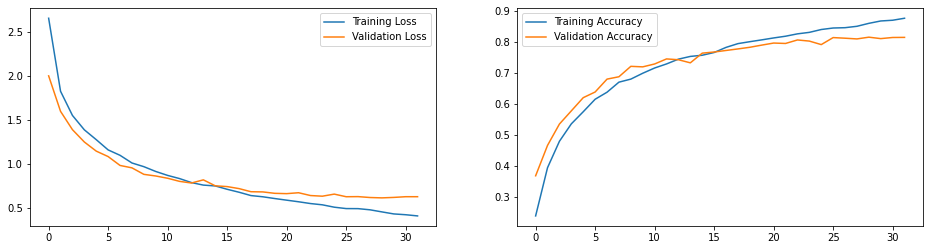

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[806,  14,  26,   9,  16,   4,   8,  11,  75,  31],
       [  7, 911,   5,   4,   1,   0,   1,   0,  22,  49],
       [ 66,   5, 693,  51,  68,  49,  40,  10,  11,   7],
       [ 20,   9,  55, 629,  58, 139,  34,  13,  21,  22],
       [ 14,   3,  51,  40, 801,  28,  21,  27,  11,   4],
       [ 10,   6,  25, 149,  42, 712,  14,  22,   8,  12],
       [  6,   6,  33,  66,  20,  12, 840,   1,  12,   4],
       [ 14,   3,  30,  47,  57,  44,   1, 784,   3,  17],
       [ 23,  15,   7,   9,   5,   1,   1,   0, 923,  16],
       [ 17,  54,   5,  11,   1,   3,   2,   3,  21, 883]], dtype=int32)>

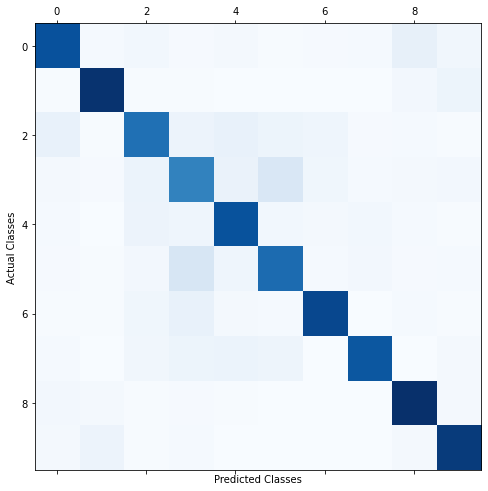

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

Our `dense neural network` will consist of `784 input nodes`, a hidden layer with `1 node` and 10 output nodes (corresponding to the 10 digits). We use `mnist.load_data()` to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation. After training the model, we group the 60,000 `activation` values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a `boxplot`. We expect the overlap between the range of values in the "boxes" to be minimal. In addition, we find the pattern that maximally activates the hidden node as a "warm up" exercise for similar analysis we will perform on `CNN` models in `Assignment 2`.



# **EXPERIMENT 8:** 


CNN with 4 convolution/max pooling layers (with Drop Out regularization). Add Padding. Change stride to 2.


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(2, 2), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         5

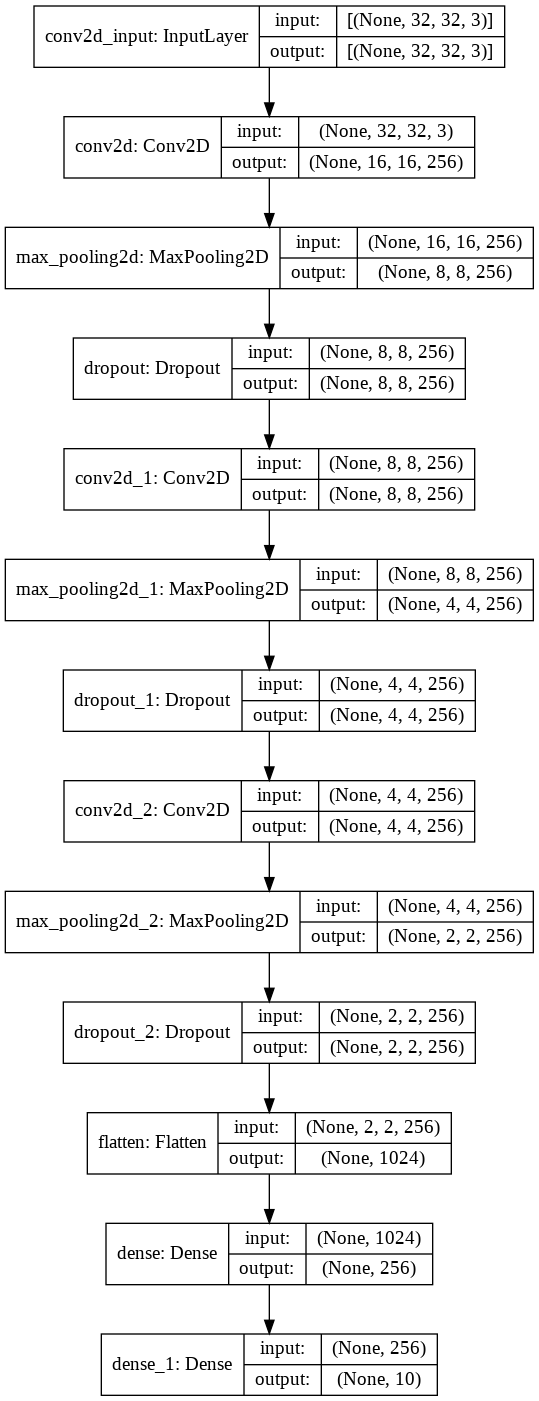

In [ ]:
keras.utils.plot_model(model, "CIFAR10_7.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_7/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 23s 143ms/step - loss: 2.6485 - accuracy: 0.2462 - val_loss: 2.0258 - val_accuracy: 0.3680
Epoch 2/200
46/46 [==============================] - 3s 63ms/step - loss: 1.8537 - accuracy: 0.3969 - val_loss: 1.6283 - val_accuracy: 0.4657
Epoch 3/200
46/46 [==============================] - 3s 64ms/step - loss: 1.6011 - accuracy: 0.4683 - val_loss: 1.4691 - val_accuracy: 0.5127
Epoch 4/200
46/46 [==============================] - 3s 63ms/step - loss: 1.4541 - accuracy: 0.5173 - val_loss: 1.3924 - val_accuracy: 0.5107
Epoch 5/200
46/46 [==============================] - 3s 63ms/step - loss: 1.3617 - accuracy: 0.5469 - val_loss: 1.2903 - val_accuracy: 0.5740
Epoch 6/200
46/46 [==============================] - 3s 64ms/step - loss: 1.2730 - accuracy: 0.5775 - val_loss: 1.1790 - val_accuracy: 0.6123
Epoch 7/200
46/46 [==============================] - 3s 65ms/step - loss: 1.2049 - accuracy: 0.6015 - val_loss: 1.1021 - val_accuracy: 0.6373
Epoc

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

122.15889000892639

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.7552 - accuracy: 0.7586
test set accuracy:  75.85999965667725
test set loss:  0.7552064657211304


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
29  0.636     0.799     0.711         0.777
30  0.606     0.811     0.706         0.780
31  0.603     0.809     0.708         0.777
32  0.586     0.815     0.719         0.775
33  0.568     0.822     0.719         0.777

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

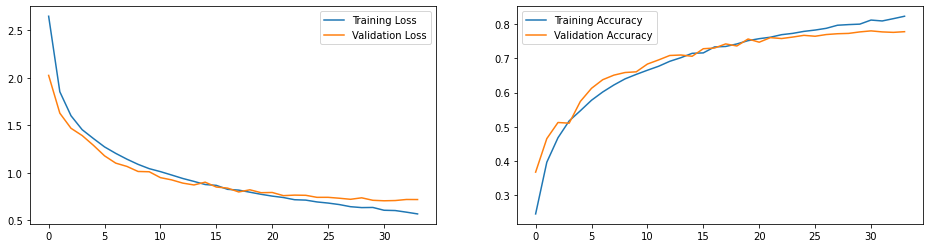

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[830,   9,  15,  13,   9,   9,   7,   8,  57,  43],
       [ 23, 776,   5,  12,   1,   2,   5,   3,  27, 146],
       [ 86,   1, 577,  51,  89,  90,  43,  35,  12,  16],
       [ 21,   5,  39, 552,  52, 225,  35,  32,  12,  27],
       [ 27,   3,  45,  38, 707,  70,  31,  68,   9,   2],
       [ 17,   2,  19, 110,  27, 749,  10,  44,   8,  14],
       [  6,   3,  24,  56,  35,  43, 811,   5,   6,  11],
       [ 21,   0,  11,  23,  29,  70,   3, 824,   3,  16],
       [ 50,  22,   5,  16,   3,   8,   1,   3, 859,  33],
       [ 30,  19,   2,  10,   3,   7,   4,   7,  17, 901]], dtype=int32)>

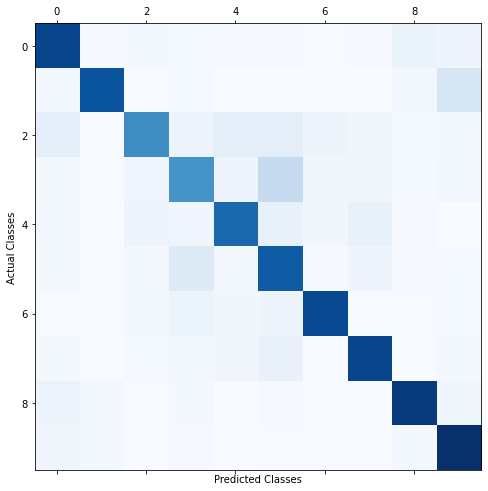

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 9:** 


CNN with 4 convolution/max pooling layers (with Drop Out regularization). Add Padding. Change stride to 2.


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(3, 3), strides=(2, 2), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)        

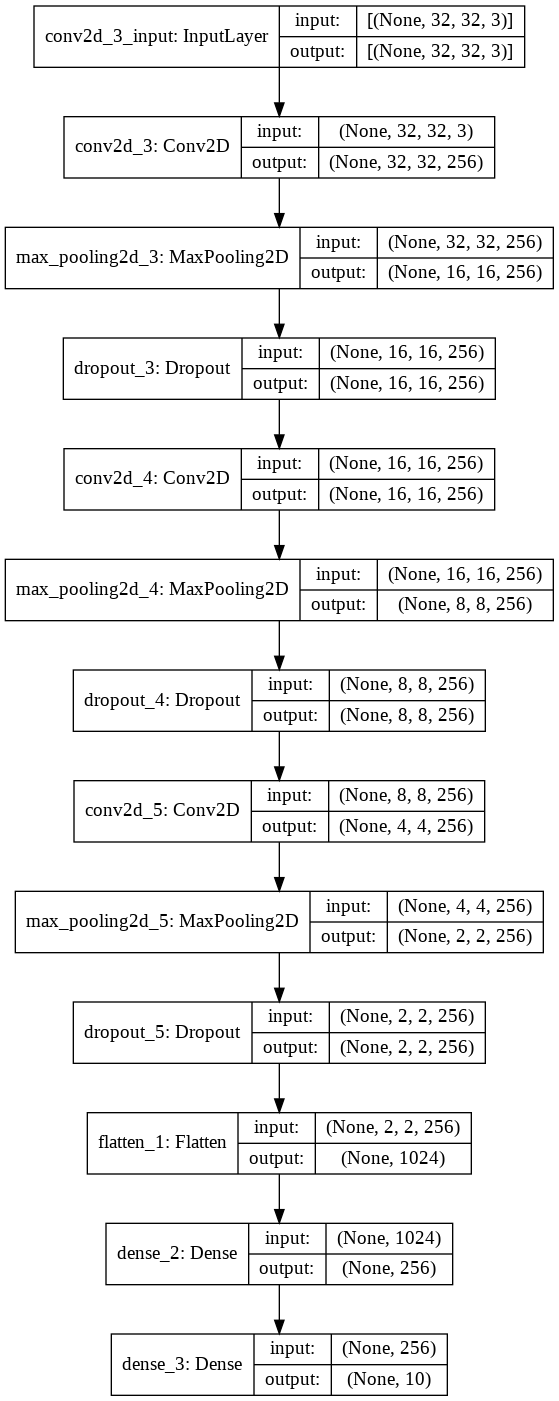

In [ ]:
keras.utils.plot_model(model, "CIFAR10_7.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_9/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 24s 399ms/step - loss: 2.6078 - accuracy: 0.2783 - val_loss: 1.9934 - val_accuracy: 0.3943
Epoch 2/200
46/46 [==============================] - 10s 227ms/step - loss: 1.8528 - accuracy: 0.4140 - val_loss: 1.7614 - val_accuracy: 0.4390
Epoch 3/200
46/46 [==============================] - 10s 226ms/step - loss: 1.5998 - accuracy: 0.4823 - val_loss: 1.4511 - val_accuracy: 0.5357
Epoch 4/200
46/46 [==============================] - 10s 223ms/step - loss: 1.4429 - accuracy: 0.5326 - val_loss: 1.3787 - val_accuracy: 0.5600
Epoch 5/200
46/46 [==============================] - 10s 222ms/step - loss: 1.3460 - accuracy: 0.5639 - val_loss: 1.2549 - val_accuracy: 0.5903
Epoch 6/200
46/46 [==============================] - 10s 221ms/step - loss: 1.2638 - accuracy: 0.5891 - val_loss: 1.2105 - val_accuracy: 0.6033
Epoch 7/200
46/46 [==============================] - 10s 221ms/step - loss: 1.1926 - accuracy: 0.6159 - val_loss: 1.1009 - val_accuracy:

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

189.5615553855896

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.8723 - accuracy: 0.7157
test set accuracy:  71.56999707221985
test set loss:  0.8722894787788391


## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
12  0.947     0.693     0.882         0.717
13  0.906     0.709     0.842         0.733
14  0.868     0.720     0.856         0.719
15  0.851     0.725     0.842         0.733
16  0.834     0.731     0.830         0.728

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

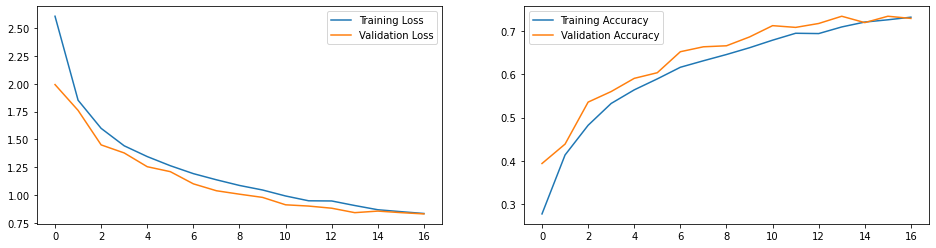

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[788,  19,  79,  14,   2,   9,   9,  17,  44,  19],
       [ 18, 871,  11,   8,   0,   9,  14,  10,  23,  36],
       [ 42,   2, 706,  33,  23,  89,  61,  32,   8,   4],
       [ 17,   9, 107, 456,  22, 267,  80,  27,   7,   8],
       [ 20,   3, 210,  54, 454,  70,  94,  82,  13,   0],
       [ 12,   3,  70, 117,  15, 728,  19,  33,   1,   2],
       [  3,   1,  79,  41,   7,  28, 835,   3,   2,   1],
       [ 13,   0,  59,  21,  24,  94,   4, 778,   2,   5],
       [ 71,  31,  27,  22,   4,   8,   7,   8, 814,   8],
       [ 39, 117,  17,  16,   3,  19,  14,  25,  23, 727]], dtype=int32)>

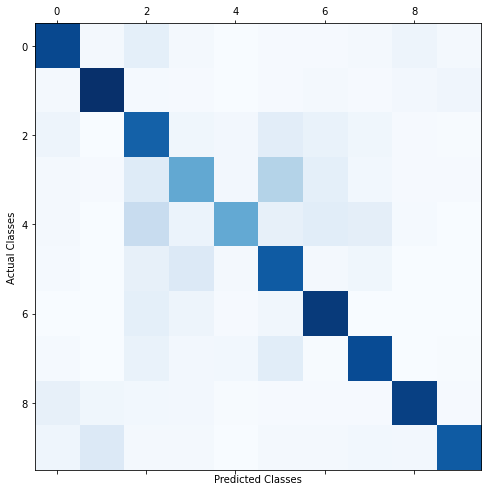

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 10:** 


CNN with 4 convolution/max pooling layers (with Drop Out regularization). Change Kernel Size to (5,5)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=256, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 256)       19456     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       1638656   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)        

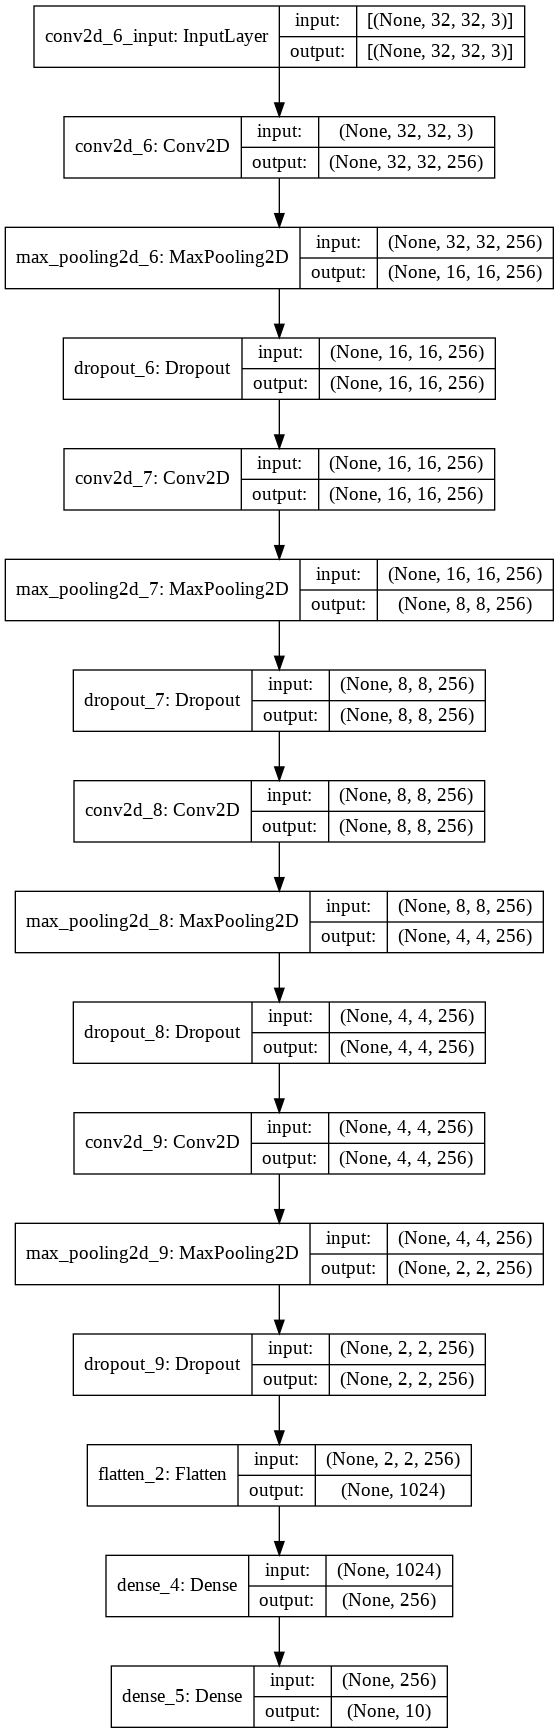

In [ ]:
keras.utils.plot_model(model, "CIFAR10_7.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=200
                    ,batch_size=1024
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_10/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
46/46 [==============================] - 36s 576ms/step - loss: 2.8802 - accuracy: 0.1534 - val_loss: 2.3158 - val_accuracy: 0.2337
Epoch 2/200
46/46 [==============================] - 15s 330ms/step - loss: 2.0138 - accuracy: 0.2983 - val_loss: 1.7583 - val_accuracy: 0.3840
Epoch 3/200
46/46 [==============================] - 15s 330ms/step - loss: 1.6924 - accuracy: 0.3935 - val_loss: 1.5386 - val_accuracy: 0.4477
Epoch 4/200
46/46 [==============================] - 15s 330ms/step - loss: 1.5476 - accuracy: 0.4506 - val_loss: 1.4205 - val_accuracy: 0.5060
Epoch 5/200
46/46 [==============================] - 15s 331ms/step - loss: 1.4247 - accuracy: 0.4927 - val_loss: 1.3031 - val_accuracy: 0.5537
Epoch 6/200
46/46 [==============================] - 15s 333ms/step - loss: 1.3080 - accuracy: 0.5398 - val_loss: 1.1612 - val_accuracy: 0.6030
Epoch 7/200
46/46 [==============================] - 15s 332ms/step - loss: 1.2386 - accuracy: 0.5673 - val_loss: 1.0816 - val_accuracy:

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

854.4531545639038

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.5771 - accuracy: 0.8137
test set accuracy:  81.3700020313263
test set loss:  0.577100932598114


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
13  0.956     0.716     1.019         0.687
14  0.929     0.724     0.951         0.718
15  0.922     0.732     0.975         0.709
16  0.898     0.737     0.974         0.709
17  0.877     0.747     0.989         0.699

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

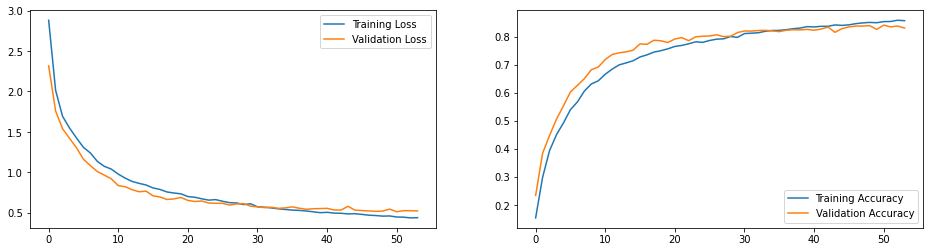

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_images_norm), axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[837,  13,  21,  15,  15,   1,  12,   9,  56,  21],
       [  4, 912,   1,   3,   1,   3,   5,   3,  12,  56],
       [ 48,   1, 655,  41,  93,  40,  84,  26,   7,   5],
       [ 10,   5,  35, 630,  68, 117,  82,  30,   6,  17],
       [  9,   1,  26,  34, 807,  11,  61,  47,   3,   1],
       [  9,   4,  17, 137,  47, 703,  36,  38,   1,   8],
       [  1,   3,   9,  30,  16,   4, 926,   3,   5,   3],
       [  7,   0,  11,  34,  36,  27,   5, 870,   1,   9],
       [ 25,  14,   7,  11,   5,   2,   5,   0, 915,  16],
       [ 20,  46,   4,  13,   3,   3,   3,   9,  17, 882]], dtype=int32)>

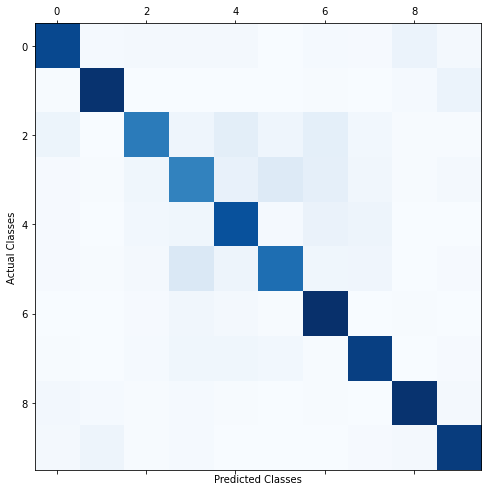

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

<div class="alert alert-block alert-info">
<b>tf.keras.models.load_model</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model</div>

In [ ]:
model = tf.keras.models.load_model('./models_10/model_0.8413.h5')

In [ ]:
preds = model.predict(test_images_norm)

In [ ]:
preds.shape

(10000, 10)

## Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


### Predictions

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

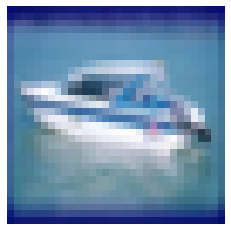

In [ ]:
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[2021]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

In [ ]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
len(activations)

8

In [ ]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d_6',
 'max_pooling2d_6',
 'dropout_6',
 'conv2d_7',
 'max_pooling2d_7',
 'dropout_7',
 'conv2d_8',
 'max_pooling2d_8',
 'dropout_8',
 'conv2d_9',
 'max_pooling2d_9',
 'dropout_9',
 'flatten_2',
 'dense_4',
 'dense_5']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


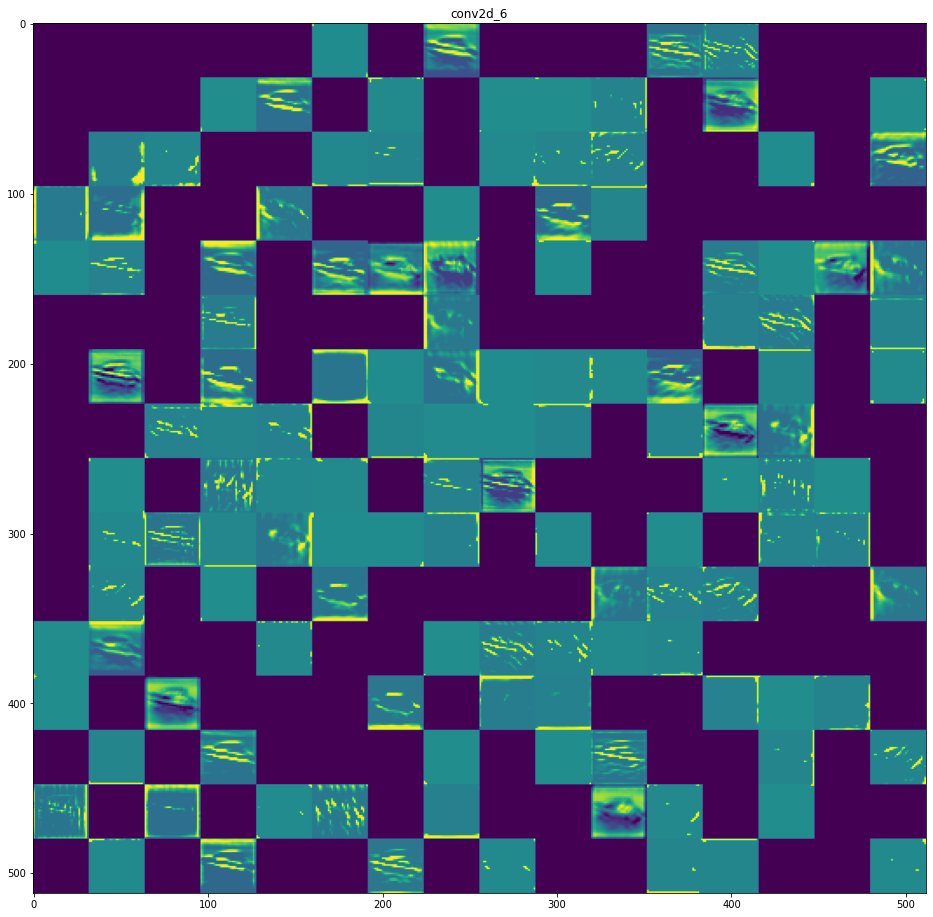

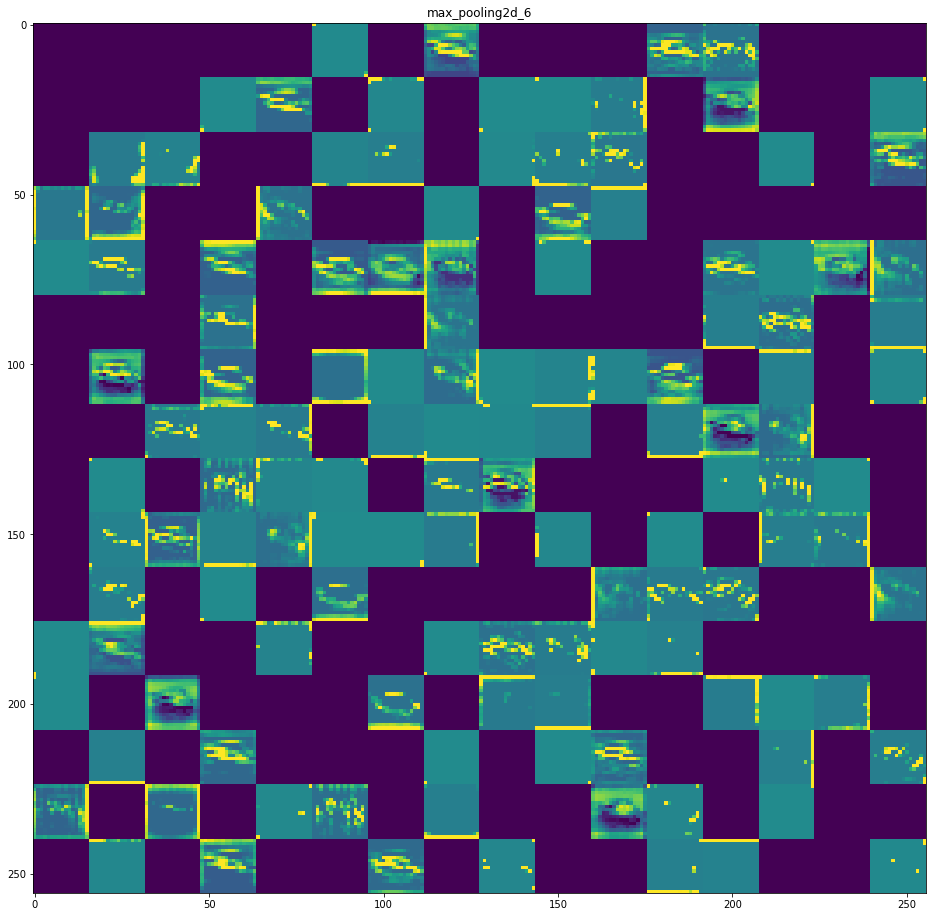

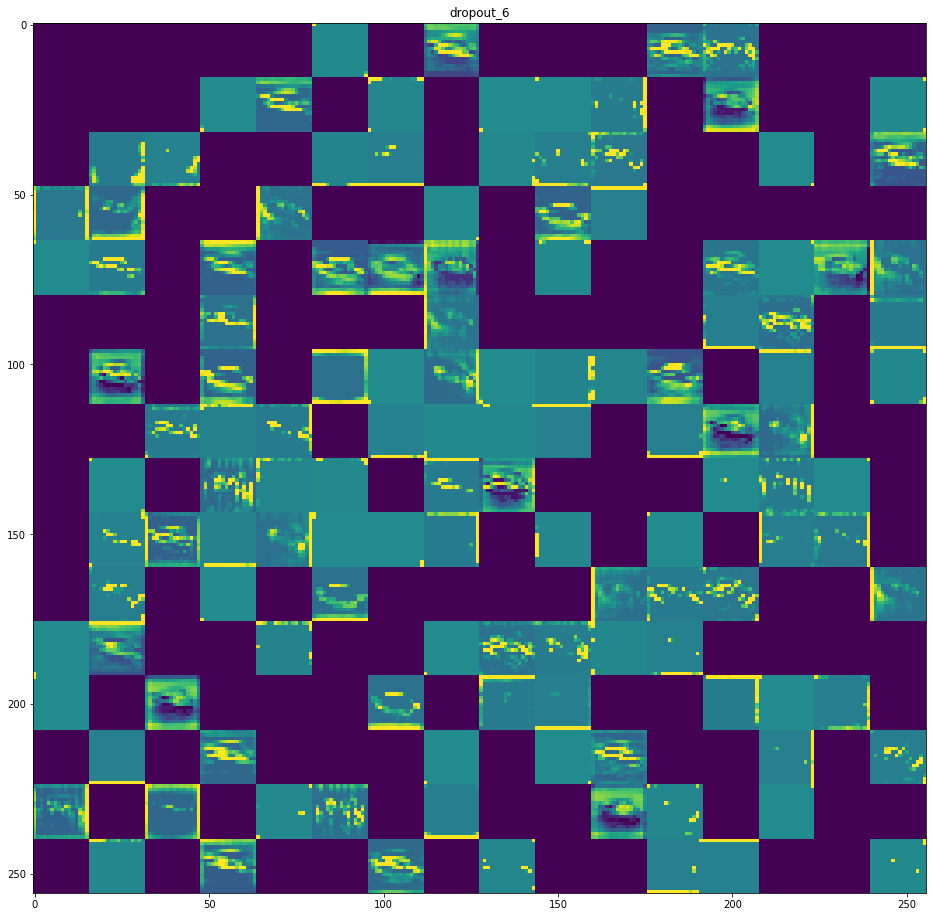

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();

In [ ]:
%%shell
jupyter nbconvert --to html /content/A_2_Computer_Vision.ipynb

[NbConvertApp] Converting notebook /content/A_2_Computer_Vision.ipynb to html
[NbConvertApp] Writing 5645149 bytes to /content/A_2_Computer_Vision.html
